# Reinforcement Q-learning simple NN as function approximation

- Portfolio grid of size 10 (0 to 1)
- 2 hidden neural layers 
- Training

In [2]:
# Initialization
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv') #Three stocks (R,X_s,X_b,s_nom,s_pe,s_spr) 

In [2]:
data = pd.read_excel('sim_data_CER.xlsx') #Three stocks (R,X_s,X_b) Without predictors

# Initialization of the Tensorflow placeholders and the network

In [20]:
num_lags = 10
num_stocks=3
num_inputvar = (num_lags+1)*num_stocks
num_actions=10
hidden1 = 20
hidden2 = 45
hidden3 = 20

#Initialize Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(shape=[1,num_inputvar],dtype=tf.float32)
# w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,1))
# w2 = tf.Variable(tf.random_uniform([hidden1,hidden2],0,1))
# w3 = tf.Variable(tf.random_uniform([hidden2,hidden3],0,1))
# w4 = tf.Variable(tf.random_uniform([hidden3,num_actions],0,1))
# b1 = tf.Variable(np.zeros((1,hidden1)), dtype=tf.float32)
# b2 = tf.Variable(np.zeros((1,hidden2)), dtype=tf.float32)
# b3 = tf.Variable(np.zeros((1,hidden3)), dtype=tf.float32)
# b4 = tf.Variable(np.zeros((1,num_actions)), dtype=tf.float32)

w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,0.01))
b1 = tf.Variable(np.ones((1,hidden1)), dtype=tf.float32) 
w2 = tf.Variable(tf.random_uniform([hidden1,num_actions],0,0.01))
b2 = tf.Variable(np.ones((1,num_actions)), dtype=tf.float32) 
# h1 = tf.add(tf.matmul(NN_input,w1),b1)
# # h_drop1 = tf.nn.dropout(h1,0.5)
# a1 = tf.nn.softmax(h1)

# h2 = tf.add(tf.matmul(a1,w2),b2)
# # h_drop2 = tf.nn.dropout(h2,0.3)
# a2 = tf.nn.softmax(h2)

# h3 = tf.add(tf.matmul(a2,w3),b3)
# # h_drop3 = tf.nn.dropout(h3,0.1)
# a3 = tf.nn.softmax(h3)

# ol = tf.add(tf.matmul(a3,w4),b4)
# output = tf.nn.softmax(ol)

outputh1 = tf.matmul(NN_input,w1)
# outputh1 = tf.nn.softmax(h1)
h2 = tf.matmul(outputh1,w2)
output = tf.nn.softmax(h2)
A_Max = tf.argmax(output,1)

Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Q_Next - output))



learning_rate = tf.placeholder(tf.float32, shape=[])
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optmzr = trainer.minimize(loss)


# A_Max = tf.argmax(output,1)
# Calculate loss for the NN from the Q values
# Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
# diff = tf.subtract(Q_Next,output)
# loss = tf.reduce_sum(tf.multiply(diff,diff))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(a4 * tf.log(Q_Next), reduction_indices=[1]))
# optmzr = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
A = np.linspace(0,1,num_actions) # portfolio weights of stocks (1-weight) is the weight in the bonds

# Training of the NN function approximation

1980-07-01 00:00:00


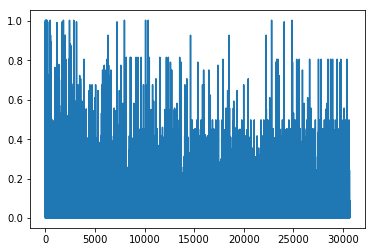

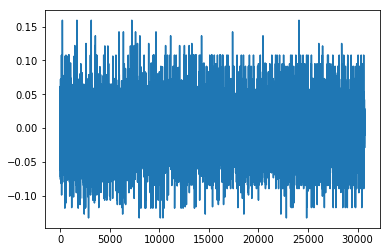

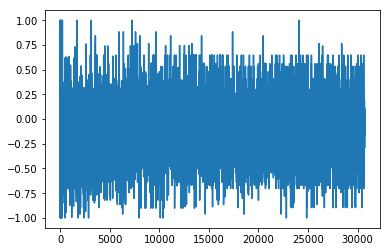

307
1.2123821349
[ 0.11111111  0.          0.77777778  0.88888889  1.          1.
  0.88888889  0.77777778  0.22222222  0.55555556  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.33333333  0.66666667  1.          0.88888889
  0.77777778  0.77777778  1.          0.77777778  0.77777778]
Writing away results
1980-08-01 00:00:00


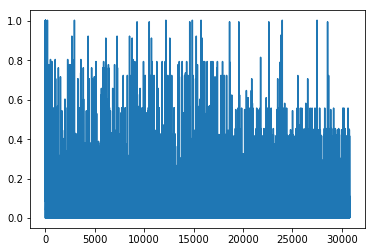

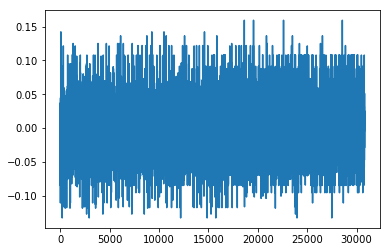

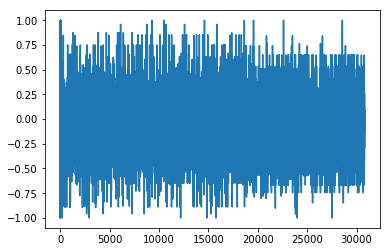

308
1.30457592551
[ 0.66666667  1.          0.77777778  0.77777778  0.          0.77777778
  0.77777778  1.          0.77777778  0.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.88888889  0.88888889  0.88888889  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444  1.
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.88888889  0.66666667  0.66666667  0.77777778  0.77777778
  0.88888889  0.77777778  0.44444444  0.77777778  0.77777778]
Writing away results
1980-09-01 00:00:00


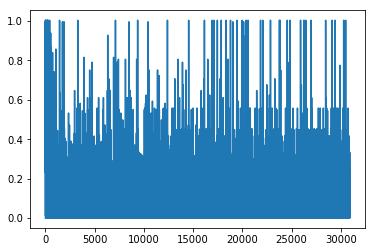

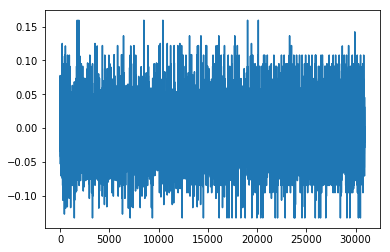

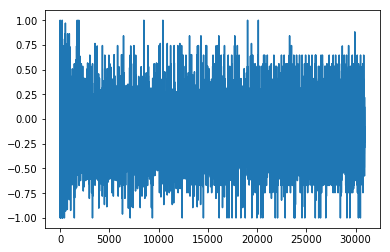

309
1.23133797123
[ 0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.66666667  0.11111111  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1980-10-01 00:00:00


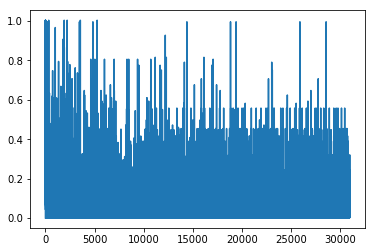

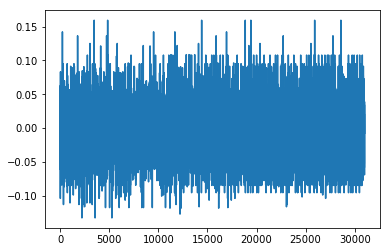

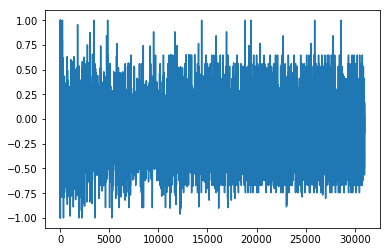

310
1.17728915595
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  1.
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.33333333  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.
  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1980-11-01 00:00:00


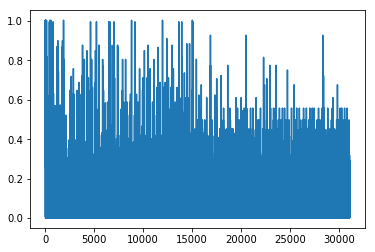

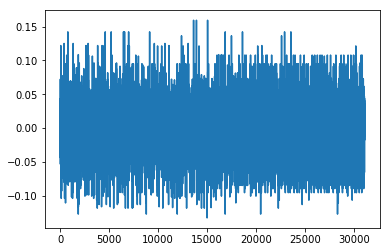

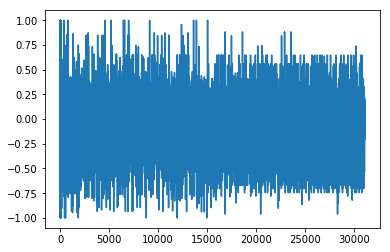

311
1.14190740404
[ 0.77777778  1.          1.          0.77777778  0.77777778  0.77777778
  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  1.          1.
  1.          1.          1.          1.          1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667
  0.55555556  0.77777778  0.77777778  1.          1.          0.77777778
  0.77777778  0.77777778  1.          1.        ]
Writing away results
1980-12-01 00:00:00


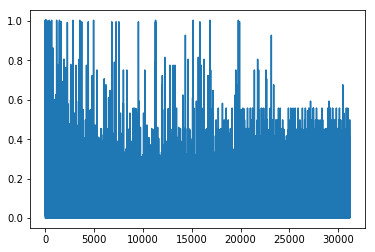

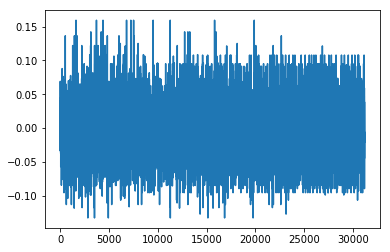

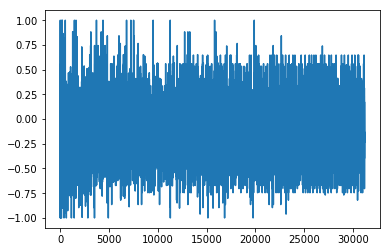

312
1.23733270486
[ 0.88888889  0.77777778  0.77777778  0.77777778  0.55555556  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-01-01 00:00:00


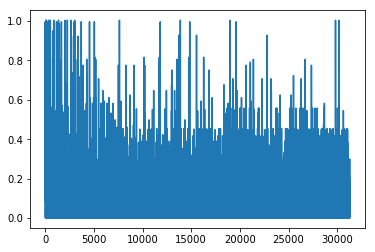

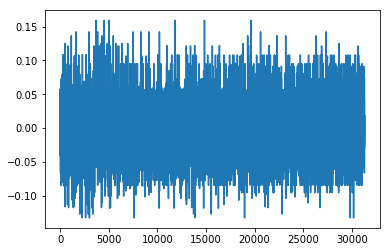

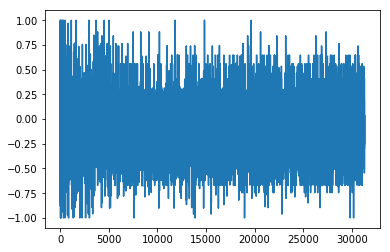

313
1.36999324218
[ 0.33333333  0.77777778  0.77777778  0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.44444444  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-02-01 00:00:00


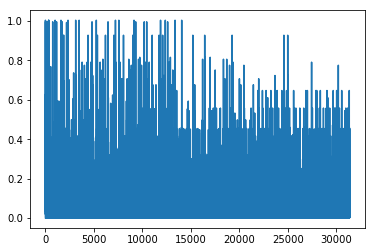

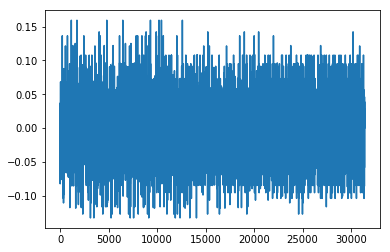

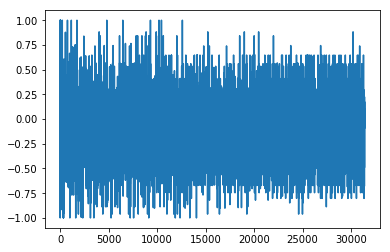

314
1.26250340714
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.88888889  0.55555556  0.88888889  0.66666667  0.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-03-01 00:00:00


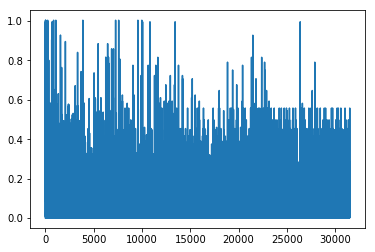

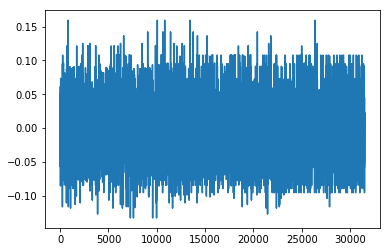

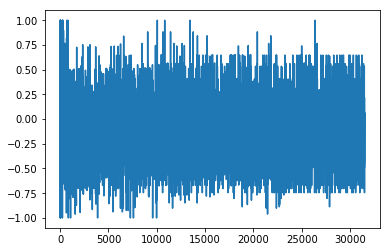

315
1.31395649468
[ 0.77777778  1.          0.55555556  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.33333333
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.66666667  0.66666667  0.22222222  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-04-01 00:00:00


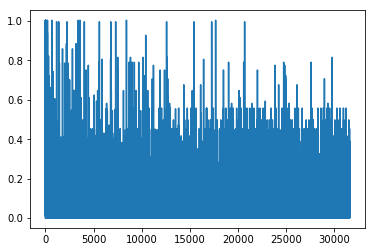

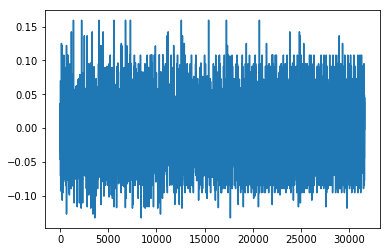

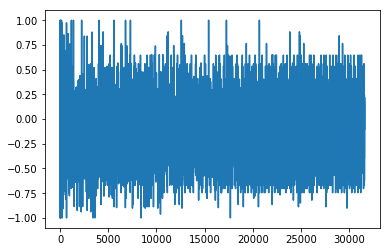

316
1.42085657781
[ 0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556
  0.66666667  0.66666667  0.11111111  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-05-01 00:00:00


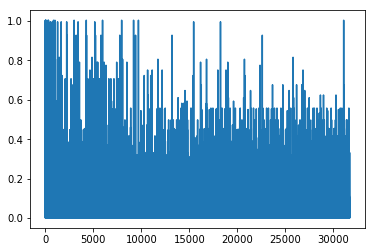

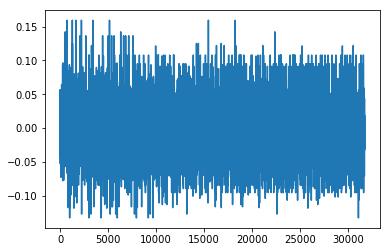

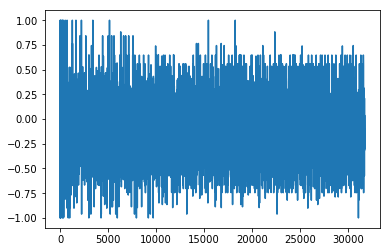

317
1.45134541504
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111  0.66666667
  0.66666667  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-06-01 00:00:00


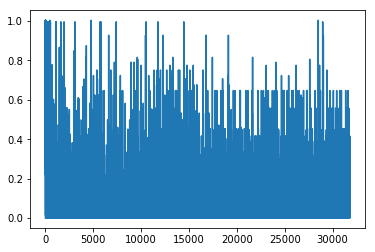

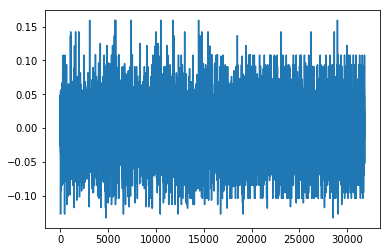

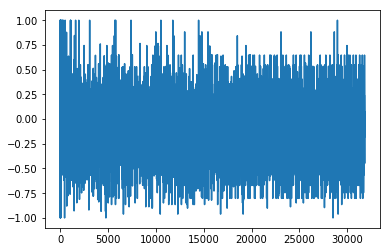

318
1.50370824533
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.77777778  0.88888889  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  0.88888889
  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-07-01 00:00:00


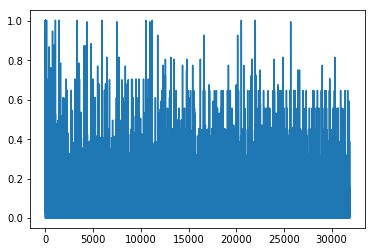

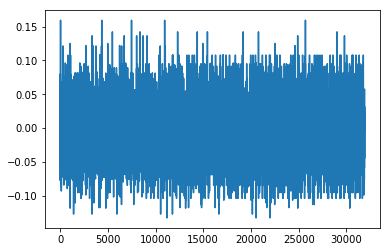

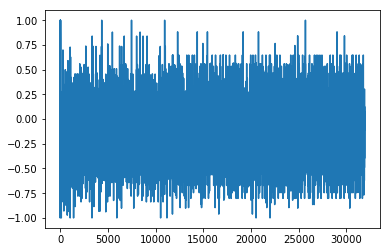

319
1.5696854054
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.66666667  0.66666667  0.66666667
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-08-01 00:00:00


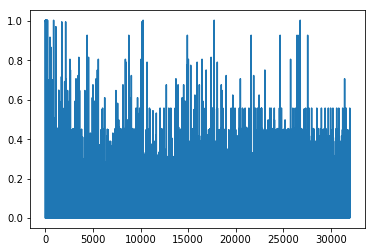

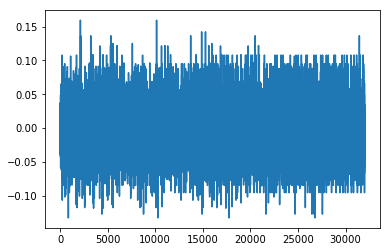

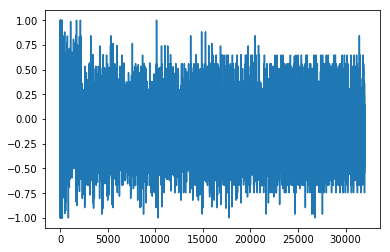

320
1.60562235751
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.44444444  0.66666667  0.66666667  0.88888889  0.77777778
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-09-01 00:00:00


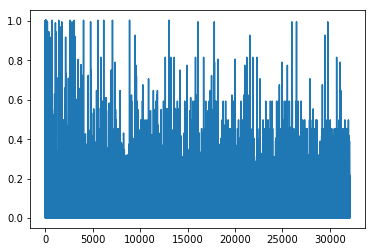

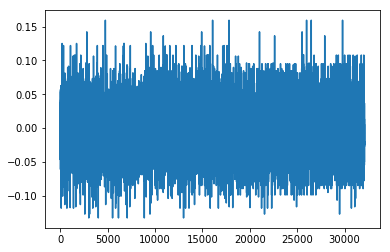

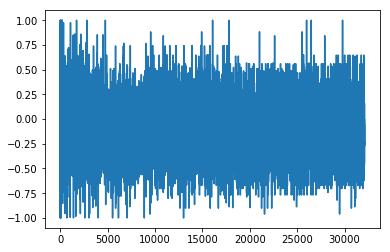

321
1.59147087252
[ 0.66666667  0.66666667  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.55555556  0.22222222  0.22222222
  0.77777778  0.22222222  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.          0.77777778  0.77777778  0.11111111  0.77777778
  0.66666667  1.          0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.77777778  0.22222222  0.44444444  0.44444444
  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444]
Writing away results
1981-10-01 00:00:00


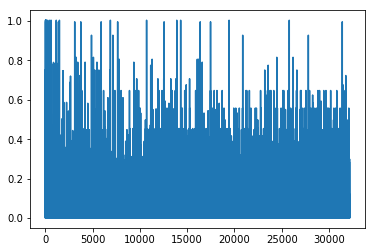

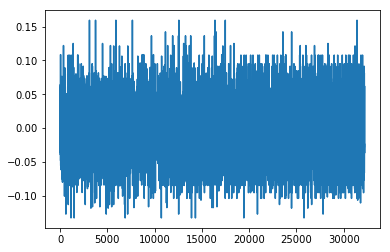

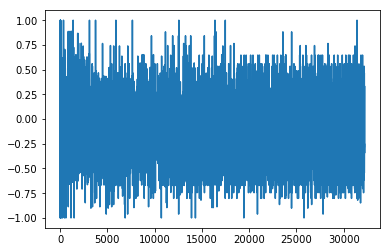

322
1.61024283744
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.66666667  0.55555556  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-11-01 00:00:00


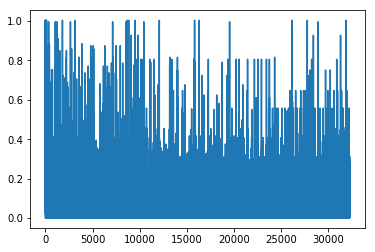

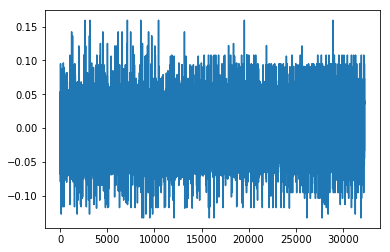

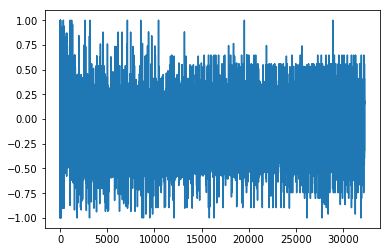

323
1.84588037431
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  1.
  0.77777778  1.          1.          1.          1.          1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556
  0.77777778  0.33333333  0.          0.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.11111111  0.22222222  0.66666667
  0.22222222  1.          1.          1.          1.          1.
  0.77777778  0.77777778  0.77777778  0.33333333  1.          1.
  0.77777778  0.77777778  0.77777778  1.          0.77777778  1.          1.
  1.          1.          0.77777778  0.33333333]
Writing away results
1981-12-01 00:00:00


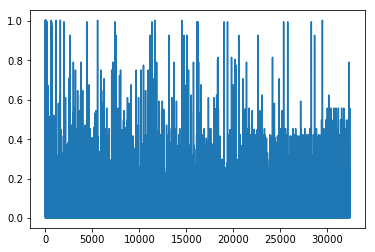

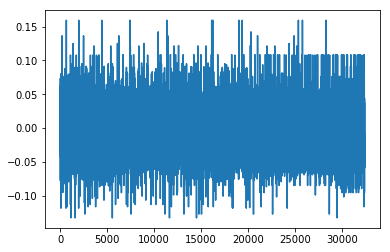

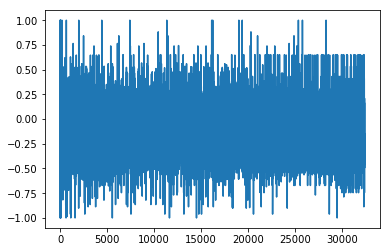

324
1.71287610013
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.11111111  0.88888889  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.33333333  0.77777778  0.77777778
  0.33333333  0.77777778  0.11111111  0.66666667  0.11111111  0.66666667
  0.66666667  0.66666667  0.88888889  0.11111111  0.88888889  0.44444444
  0.88888889  0.77777778  0.88888889  0.88888889  0.33333333  0.77777778
  0.77777778  0.77777778  0.33333333  0.77777778  0.77777778  0.77777778
  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-01-01 00:00:00


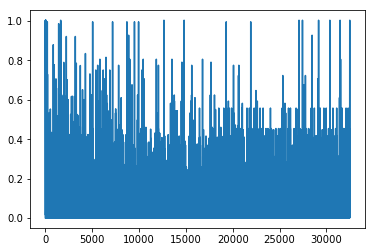

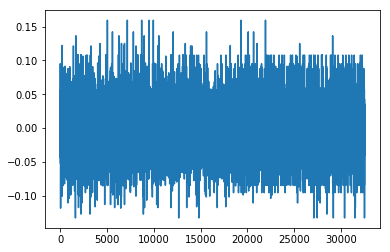

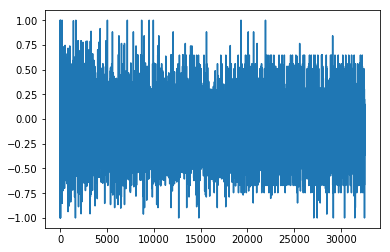

325
1.55438988197
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  1.          0.33333333  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.66666667  0.66666667  0.22222222
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-02-01 00:00:00


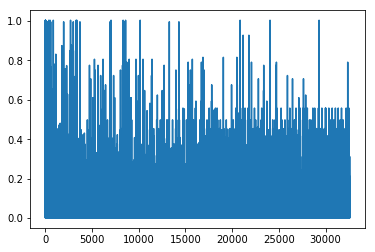

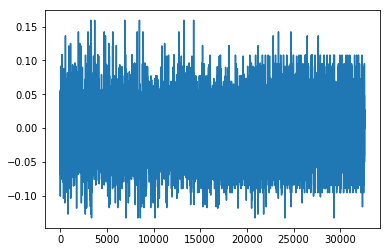

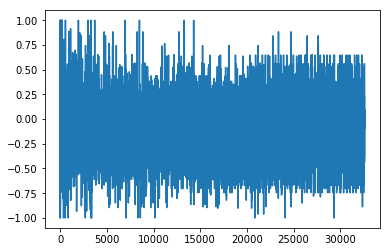

326
1.91679144354
[ 0.66666667  0.66666667  0.66666667  0.          0.66666667  0.66666667
  0.11111111  0.55555556  1.          1.          1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.          0.77777778
  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.33333333  0.88888889  0.33333333  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778]
Writing away results
1982-03-01 00:00:00


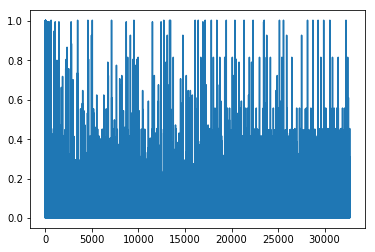

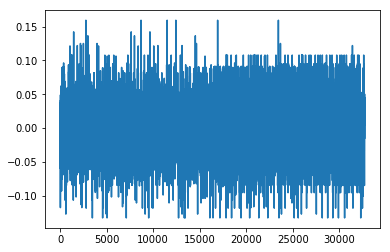

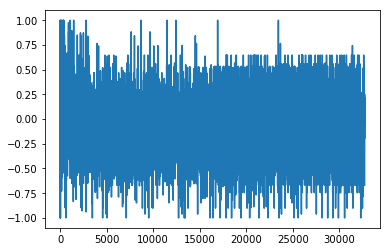

327
1.99884996765
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.55555556
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.        ]
Writing away results
1982-04-01 00:00:00


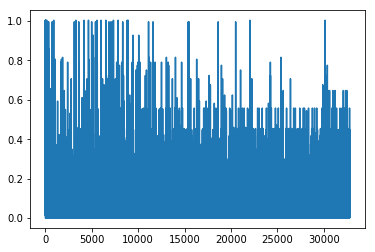

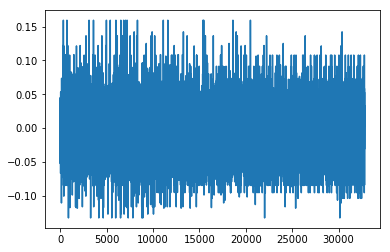

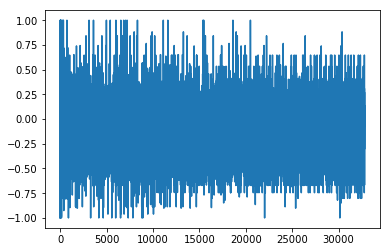

328
1.95098665439
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.88888889  0.88888889
  0.88888889  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889
  0.66666667  0.88888889  0.88888889  0.88888889  0.77777778  0.44444444
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.44444444  0.77777778  0.55555556  0.88888889  0.77777778]
Writing away results
1982-05-01 00:00:00


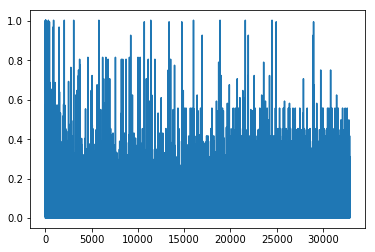

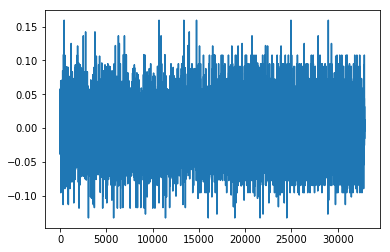

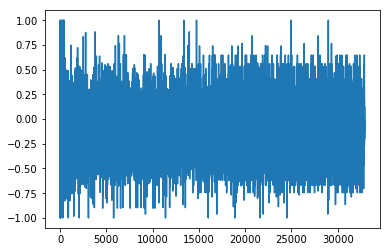

329
1.99554660244
[ 0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.44444444
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.          0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-06-01 00:00:00


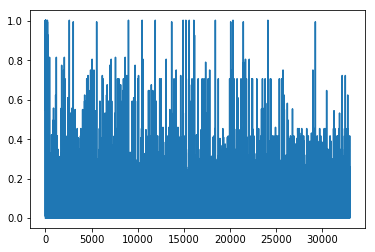

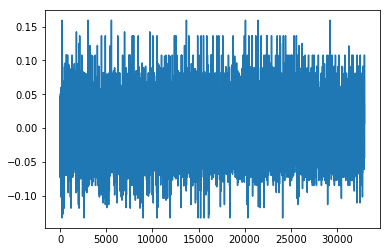

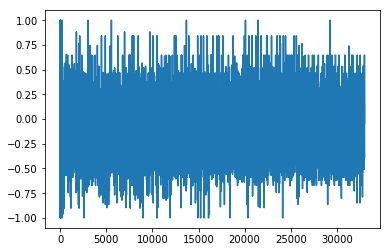

330
1.89966584376
[ 0.66666667  0.66666667  0.88888889  0.77777778  1.          0.55555556
  0.55555556  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.22222222  0.66666667  0.22222222  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  0.66666667
  0.88888889  0.77777778  0.44444444  0.55555556  0.77777778  0.77777778
  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.11111111  0.88888889  0.77777778  0.55555556  0.88888889]
Writing away results
1982-07-01 00:00:00


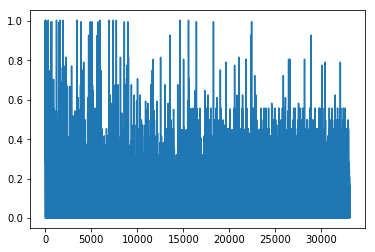

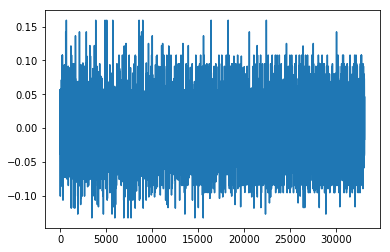

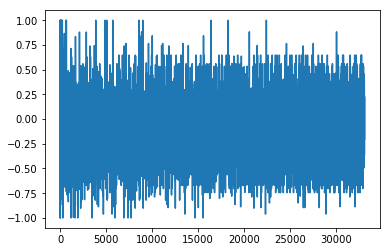

331
2.05243088366
[ 0.66666667  0.77777778  0.77777778  0.88888889  0.88888889  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.66666667  0.66666667  0.22222222
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.88888889]
Writing away results
1982-08-01 00:00:00


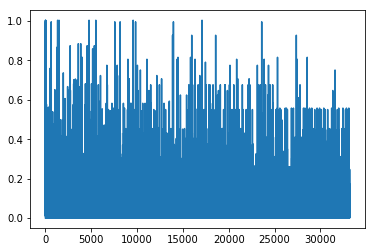

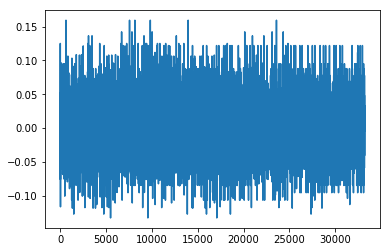

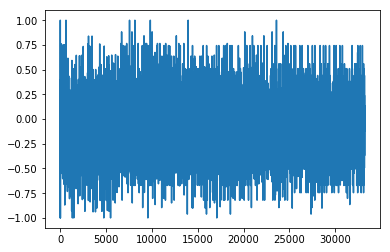

332
1.57687528354
[ 0.33333333  0.44444444  0.44444444  0.55555556  0.55555556  0.44444444
  0.77777778  0.11111111  0.88888889  1.          1.          0.77777778
  0.77777778  0.77777778  0.          0.22222222  1.          1.
  0.77777778  0.22222222  0.66666667  0.11111111  0.66666667  0.66666667
  0.44444444  0.55555556  0.66666667  0.66666667  0.44444444  0.44444444
  0.88888889  1.          1.          0.77777778  0.77777778  0.88888889
  1.          1.          0.77777778  0.77777778  1.          0.55555556
  1.          0.44444444  0.77777778  0.22222222  1.          0.77777778
  0.77777778  0.          0.77777778  0.55555556  0.33333333  0.77777778
  0.55555556  0.33333333  0.77777778  0.22222222  0.77777778]
Writing away results
1982-09-01 00:00:00


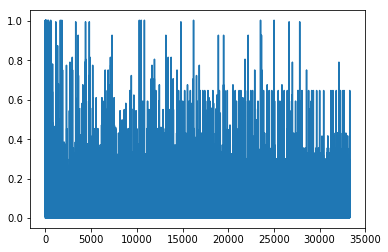

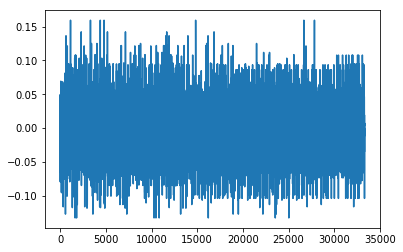

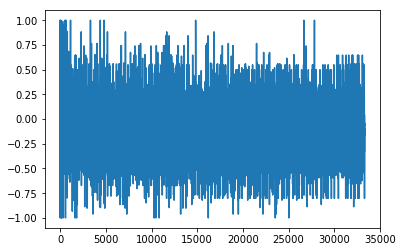

333
1.84542613916
[ 0.44444444  0.77777778  0.77777778  0.33333333  0.          1.          0.
  0.11111111  0.77777778  1.          0.77777778  1.          0.22222222
  0.66666667  0.22222222  0.66666667  0.88888889  0.66666667  0.22222222
  0.22222222  0.66666667  0.22222222  0.66666667  0.11111111  0.77777778
  0.66666667  0.33333333  0.66666667  0.22222222  0.11111111  0.77777778
  0.66666667  0.          0.          0.22222222  0.22222222  0.66666667
  1.          1.          0.77777778  0.44444444  0.77777778  1.          0.
  0.77777778  1.          0.          0.22222222  0.          1.
  0.22222222  0.66666667  1.          0.77777778  0.77777778  1.
  0.77777778  1.          0.77777778]
Writing away results
1982-10-01 00:00:00


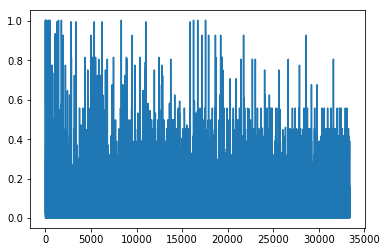

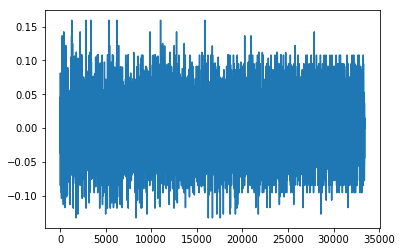

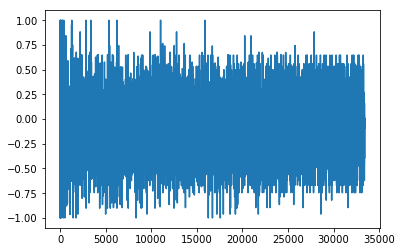

334
1.76942131813
[ 0.44444444  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556
  0.66666667  0.66666667  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-11-01 00:00:00


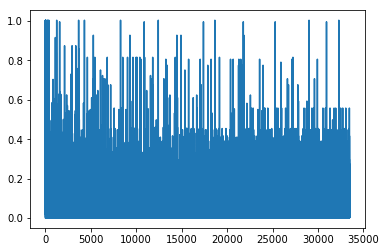

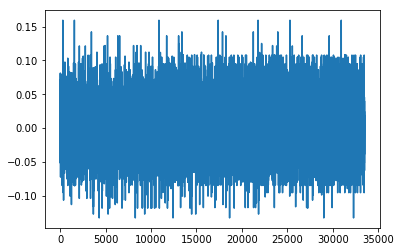

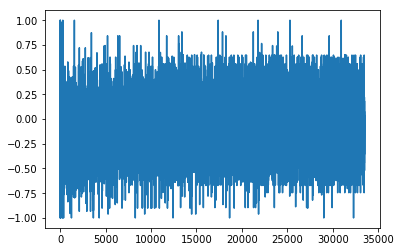

335
1.4667001919
[ 0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889  0.66666667
  0.66666667  1.          0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  1.          0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-12-01 00:00:00


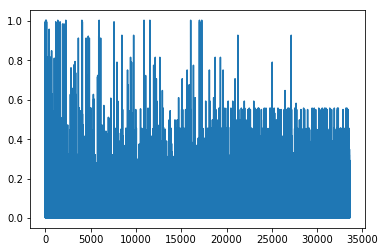

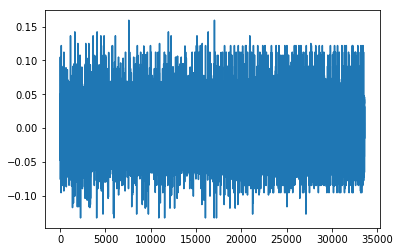

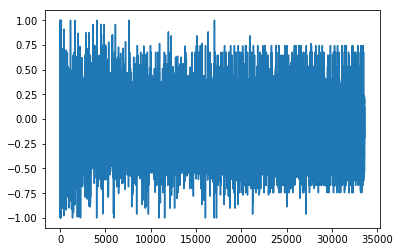

336
1.35119297564
[ 1.          0.77777778  1.          0.77777778  1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  1.
  0.55555556  0.55555556  1.          0.77777778  1.          0.77777778
  1.          1.          0.77777778  0.77777778  0.77777778  0.77777778
  1.          1.          0.77777778  0.77777778  1.          1.
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.77777778
  1.          1.          0.77777778  1.          1.          0.55555556
  1.          0.77777778  0.77777778  1.          0.77777778]
Writing away results
1983-01-01 00:00:00


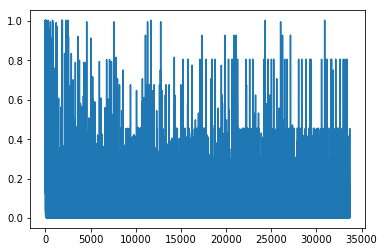

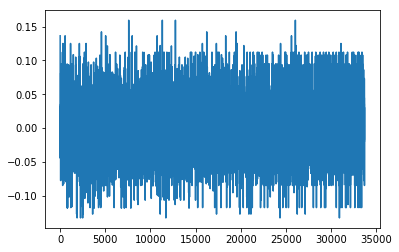

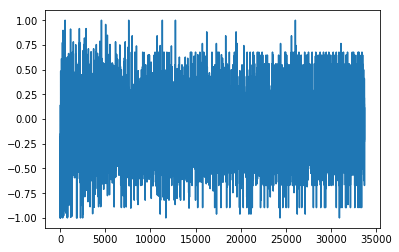

337
1.4231363176
[ 0.88888889  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.88888889  0.66666667  1.
  0.88888889  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.88888889  1.          0.          0.77777778
  0.77777778  0.77777778  0.77777778  0.          0.66666667]
Writing away results
1983-02-01 00:00:00


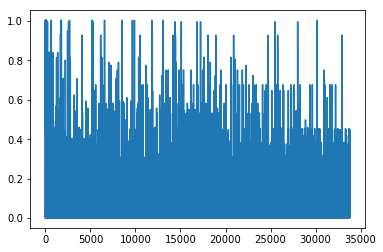

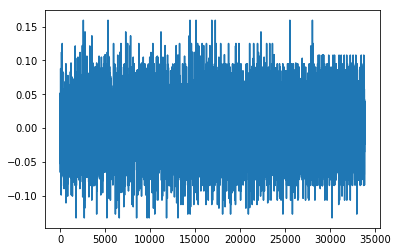

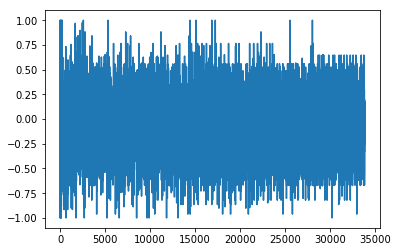

338
1.67057167391
[ 1.          0.77777778  0.77777778  0.44444444  0.77777778  0.77777778
  0.77777778  0.77777778  0.44444444  0.77777778  0.55555556  0.
  0.66666667  0.88888889  0.66666667  0.66666667  0.66666667  0.66666667
  0.22222222  0.66666667  0.22222222  0.66666667  1.          0.77777778
  0.44444444  0.44444444  1.          1.          0.33333333  0.44444444
  0.77777778  0.44444444  0.77777778  0.44444444  0.44444444  0.77777778
  1.          0.77777778  0.44444444  0.77777778  0.77777778  0.44444444
  0.77777778  0.44444444  0.77777778  0.77777778  0.44444444  0.77777778
  1.          0.44444444  1.          0.88888889  0.77777778  1.
  0.77777778  0.          0.88888889  0.33333333  0.66666667]
Writing away results
1983-03-01 00:00:00


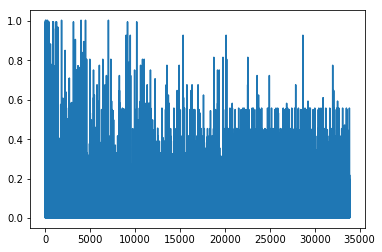

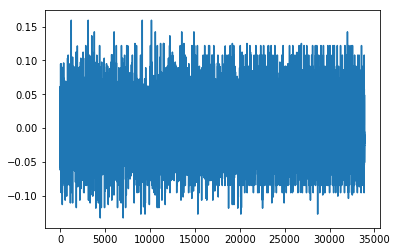

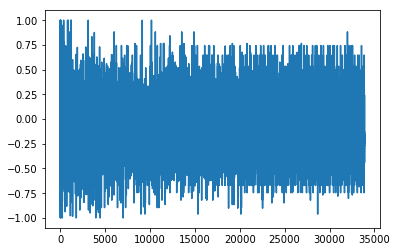

339
1.46221992247
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.66666667  0.66666667  1.          0.77777778  0.77777778
  0.77777778  1.          1.          0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  1.          0.77777778  0.77777778
  0.77777778  1.          1.          0.77777778  0.77777778  0.77777778
  1.          0.11111111  0.66666667  0.66666667  0.44444444]
Writing away results
1983-04-01 00:00:00


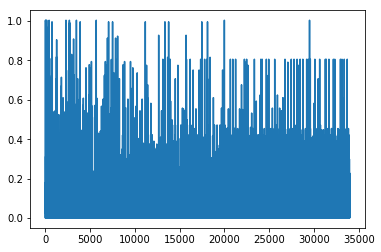

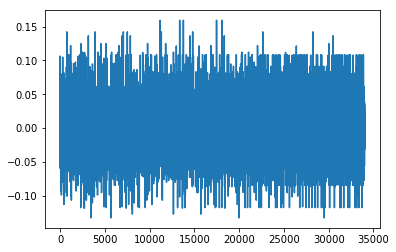

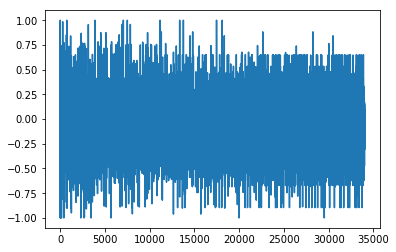

340
1.27761549081
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.33333333  0.66666667
  0.33333333  0.66666667  0.66666667  0.33333333  0.66666667  0.44444444
  1.          0.66666667  1.          0.88888889  1.          1.
  0.88888889  0.77777778  0.77777778  0.77777778  1.          1.
  0.55555556  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  1.          1.          1.          1.          0.77777778  0.77777778
  1.          0.77777778  0.88888889  0.88888889  0.77777778  0.77777778
  0.77777778  0.22222222  0.11111111  1.          0.77777778  0.77777778
  0.22222222  0.66666667  0.66666667  0.33333333  0.44444444]
Writing away results
1983-05-01 00:00:00


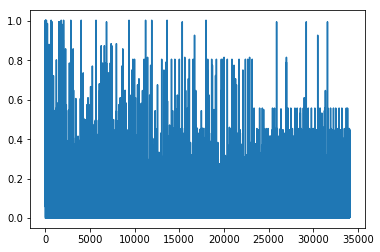

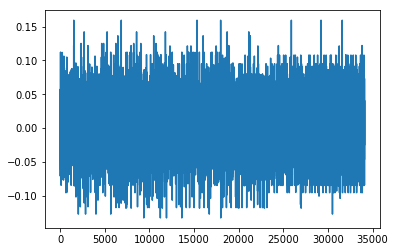

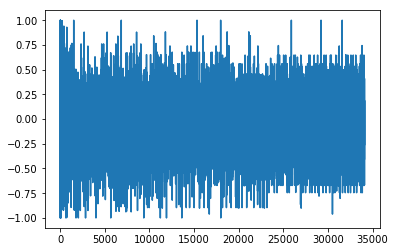

341
1.50567956074
[ 0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.11111111  0.22222222  0.88888889  0.22222222  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444  0.66666667
  0.66666667  0.77777778  0.33333333  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.33333333  0.55555556  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.11111111  0.88888889  0.11111111  0.77777778  1.
  0.77777778  0.88888889  0.77777778  0.77777778  0.11111111  0.
  0.22222222  0.22222222  0.33333333  0.66666667  0.66666667]
Writing away results
1983-06-01 00:00:00


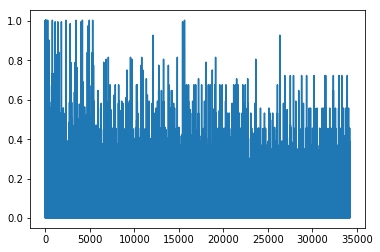

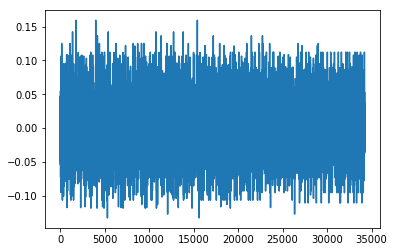

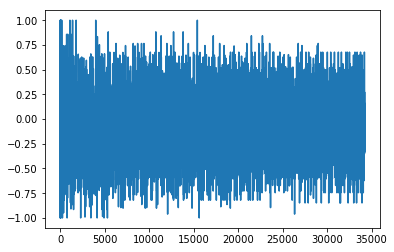

342
1.25913684485
[ 1.          1.          1.          1.          0.77777778  0.77777778
  0.33333333  0.22222222  0.77777778  0.88888889  1.          0.11111111
  0.66666667  0.66666667  0.44444444  0.77777778  0.66666667  0.66666667
  0.88888889  0.88888889  0.88888889  0.66666667  0.66666667  0.22222222
  1.          0.77777778  0.66666667  0.66666667  0.77777778  1.          1.
  0.66666667  0.66666667  1.          0.88888889  0.88888889  0.66666667
  0.11111111  0.77777778  0.33333333  0.22222222  0.77777778  1.          1.
  0.88888889  1.          0.55555556  0.66666667  1.          0.77777778
  0.77777778  1.          0.11111111  0.22222222  0.          0.77777778
  0.77777778  0.66666667  0.66666667]
Writing away results
1983-07-01 00:00:00


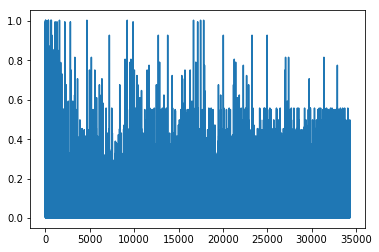

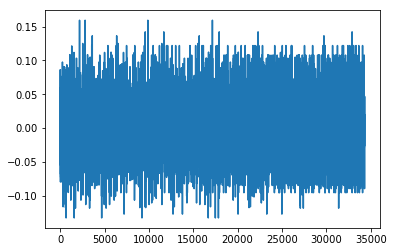

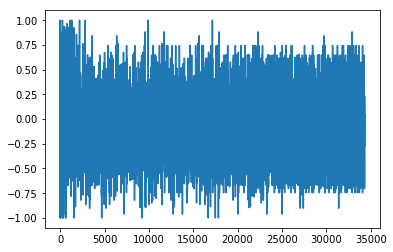

343
1.39199349331
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.          1.
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.11111111  0.66666667  0.66666667  0.33333333
  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1983-08-01 00:00:00


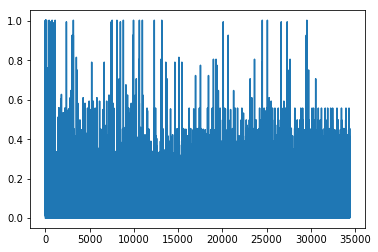

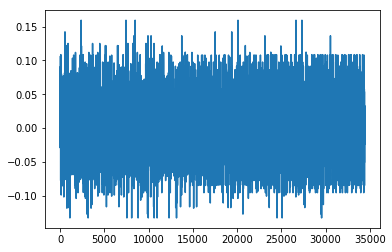

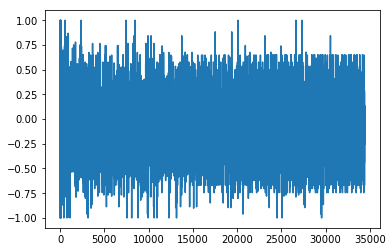

344
1.28788041316
[ 0.77777778  0.77777778  0.77777778  0.88888889  0.88888889  0.88888889
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.88888889  0.88888889  0.66666667  0.66666667  0.66666667
  1.          0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1983-09-01 00:00:00


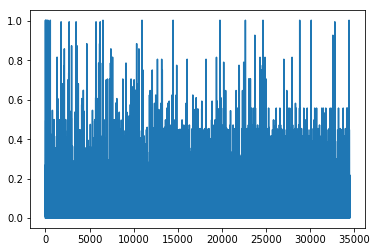

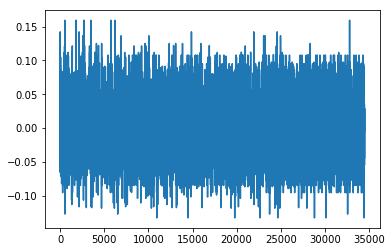

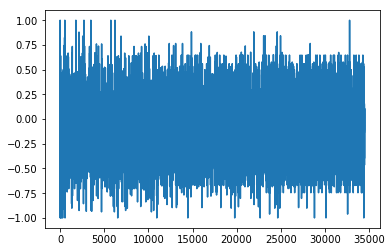

345
1.32890342558
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.          0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.66666667  0.66666667  0.44444444  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.55555556  0.55555556
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1983-10-01 00:00:00


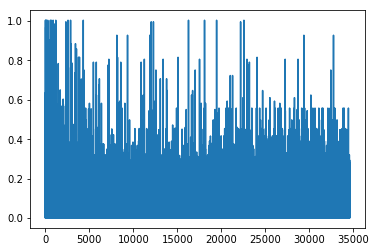

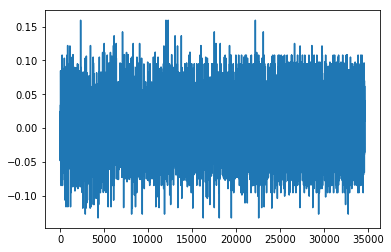

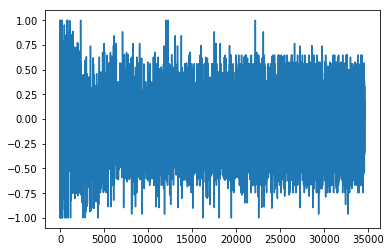

346
1.36933028481
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444  0.55555556
  1.          0.66666667  1.          0.77777778  1.          1.          1.
  1.          0.77777778  0.77777778  1.          1.          0.77777778
  0.77777778  0.77777778  1.          1.          1.          0.77777778
  1.          1.          1.          0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.          1.
  1.          0.77777778  0.77777778  1.          0.11111111  0.66666667
  0.66666667  0.11111111  0.77777778  0.66666667  0.66666667  0.66666667
  0.          0.66666667  0.66666667]
Writing away results
1983-11-01 00:00:00


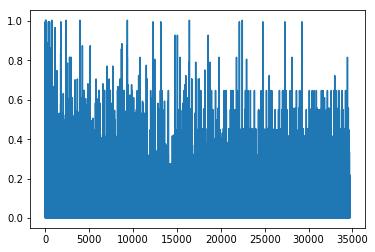

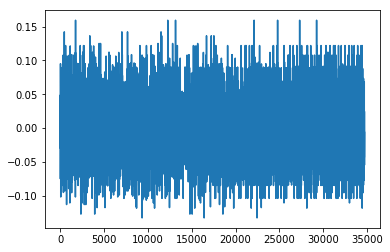

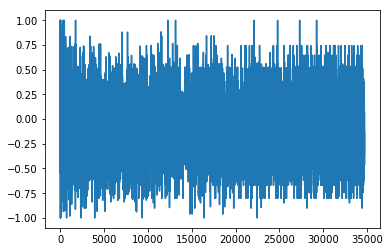

347
1.34184160072
[ 0.77777778  1.          1.          1.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333  0.44444444
  0.77777778  0.66666667  0.77777778  0.88888889  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.11111111  0.77777778  0.44444444  0.77777778  0.77777778
  0.88888889  0.77777778  0.88888889  0.77777778  0.77777778  0.11111111
  0.66666667  0.66666667  0.66666667  1.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.22222222  0.77777778]
Writing away results
1983-12-01 00:00:00


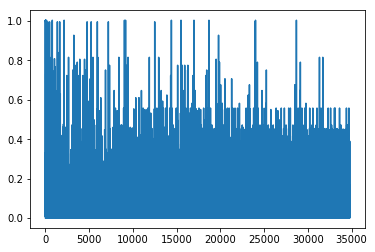

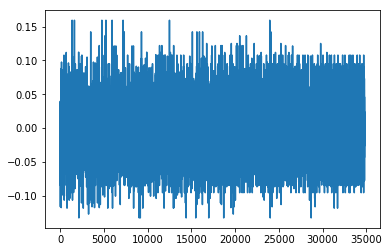

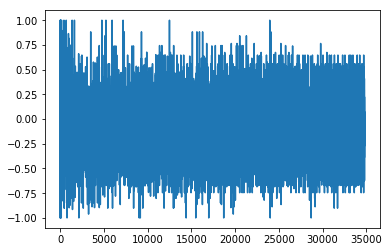

348
1.36736837583
[ 1.          1.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.22222222  0.66666667  0.66666667
  1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  1.          1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.11111111  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  1.          0.77777778]
Writing away results
1984-01-01 00:00:00


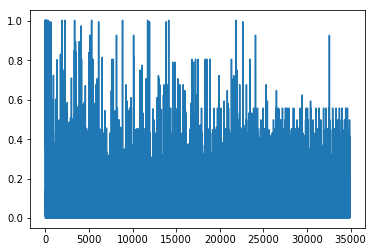

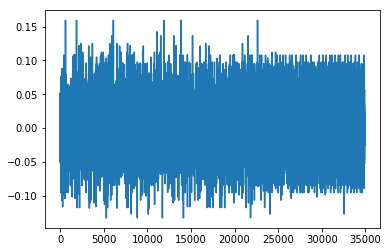

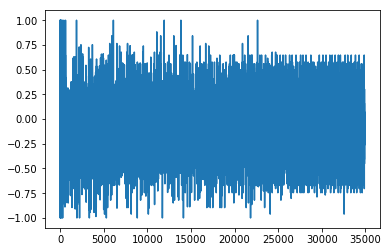

349
1.40901689209
[ 0.77777778  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667  0.88888889
  0.77777778  0.88888889  0.88888889  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.33333333  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.88888889  0.88888889  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.88888889  0.77777778
  0.88888889  0.77777778  0.77777778  0.66666667  0.66666667  0.44444444
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.
  0.66666667  0.66666667  0.33333333  0.77777778  0.77777778]
Writing away results
1984-02-01 00:00:00


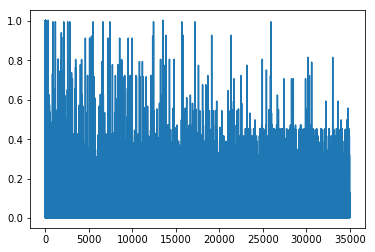

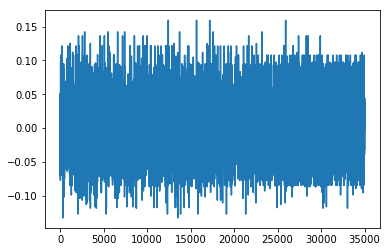

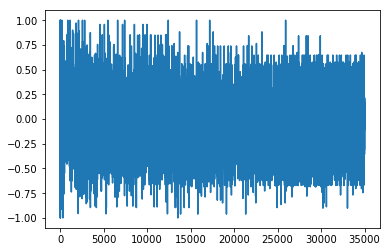

350
1.6208177029
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.11111111  0.          1.          0.55555556  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  1.          1.          0.77777778  0.44444444
  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.66666667  1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  1.        ]
Writing away results
1984-03-01 00:00:00


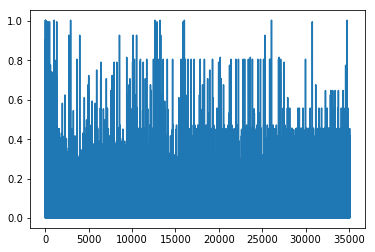

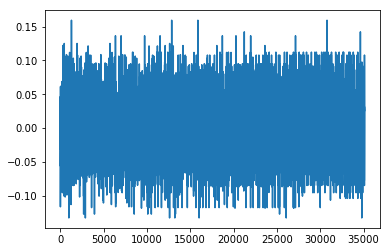

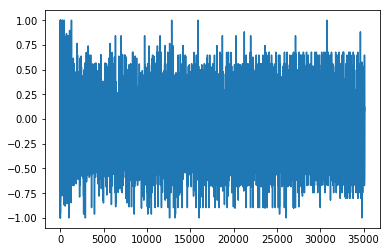

351
1.55165345901
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.66666667  1.          1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.44444444  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.77777778  1.          0.77777778  0.77777778]
Writing away results
1984-04-01 00:00:00


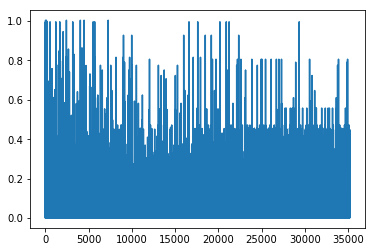

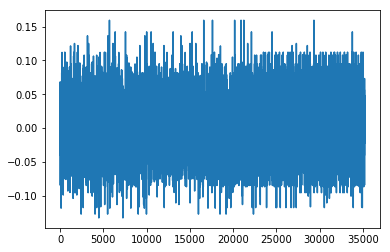

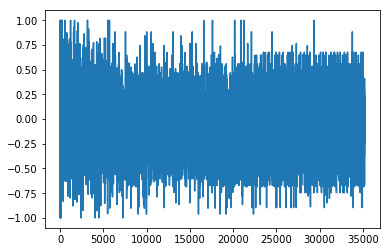

352
1.56161050803
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.
  0.66666667  0.66666667  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.66666667  0.66666667  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  0.55555556  0.33333333  0.77777778]
Writing away results
1984-05-01 00:00:00


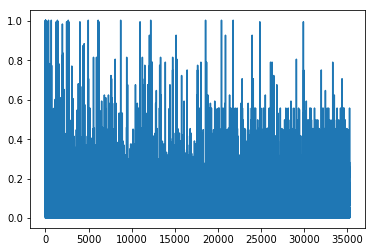

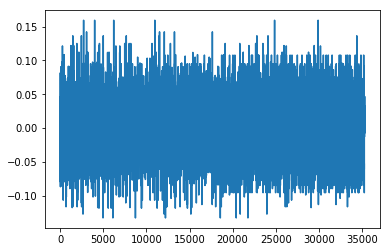

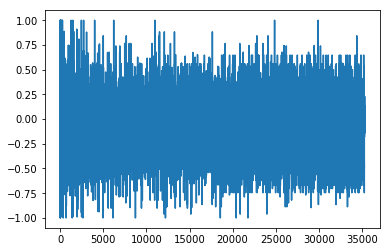

353
1.71038054819
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.44444444  0.66666667
  0.66666667  1.          0.77777778  0.77777778  0.88888889  1.
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.          1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556  0.66666667
  0.22222222  0.33333333  0.66666667  0.66666667  0.55555556  0.77777778
  0.66666667  0.66666667  0.66666667  0.55555556  0.77777778  0.77777778
  1.          1.          0.77777778  0.88888889]
Writing away results
1984-06-01 00:00:00


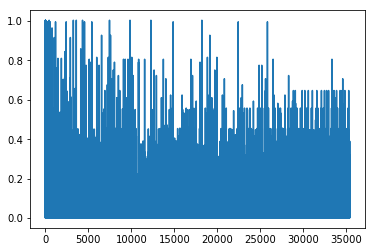

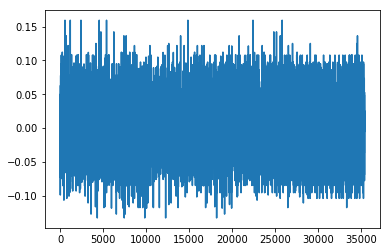

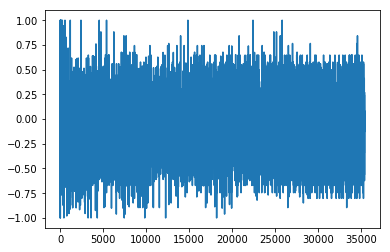

354
1.88643201453
[ 0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  0.66666667
  1.          1.          0.77777778  1.          1.          1.
  0.77777778  1.          1.          1.          1.          0.77777778
  1.          1.          1.          0.77777778  1.          1.          1.
  1.          0.77777778  0.77777778  1.          0.77777778  1.
  0.77777778  0.77777778  1.          0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.11111111  0.66666667  0.
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.66666667  0.66666667  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.44444444  1.          0.77777778]
Writing away results
1984-07-01 00:00:00


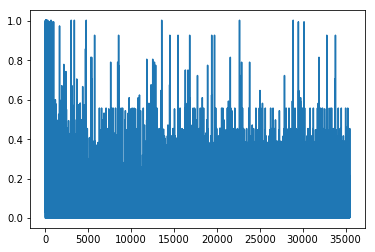

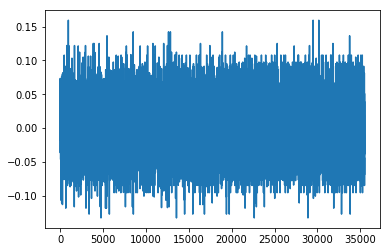

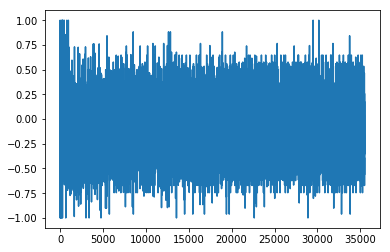

355
1.6623453114
[ 0.66666667  0.66666667  0.88888889  0.66666667  0.66666667  0.66666667
  0.77777778  0.77777778  1.          1.          0.77777778  0.77777778
  0.77777778  1.          1.          0.77777778  0.77777778  0.77777778
  1.          1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.33333333  0.66666667  0.
  0.77777778  0.88888889  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.77777778  0.77777778  1.          1.
  0.77777778  1.          0.77777778  0.77777778]
Writing away results
1984-08-01 00:00:00


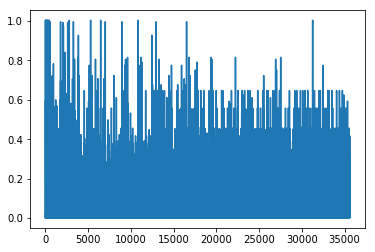

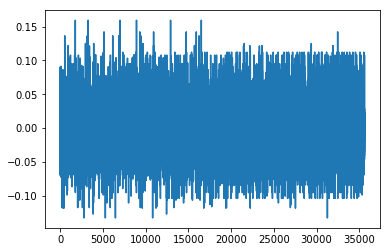

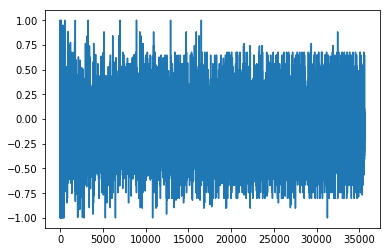

356
1.8160765695
[ 0.66666667  1.          0.66666667  0.66666667  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.          0.66666667  0.66666667  1.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.44444444  0.77777778  0.77777778  0.77777778  0.55555556
  0.77777778  0.88888889  0.77777778  1.          0.77777778]
Writing away results
1984-09-01 00:00:00


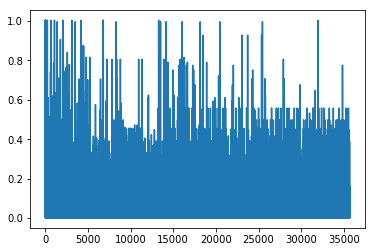

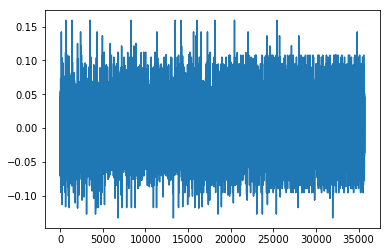

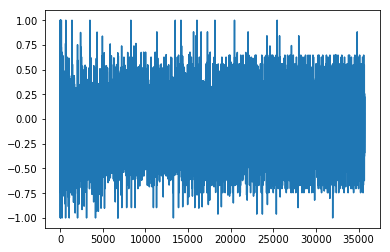

357
1.81178883889
[ 0.          0.55555556  1.          1.          0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          1.          1.          0.77777778  0.77777778
  0.77777778  0.55555556  0.33333333  0.66666667  0.66666667  0.11111111
  0.66666667  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778]
Writing away results
1984-10-01 00:00:00


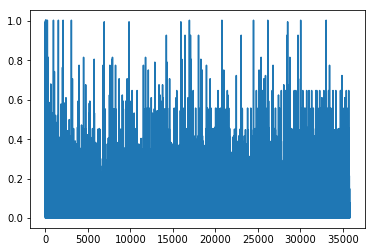

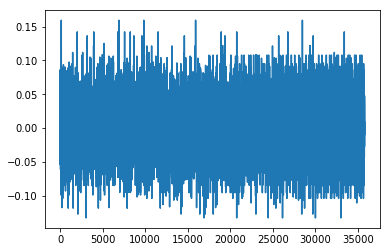

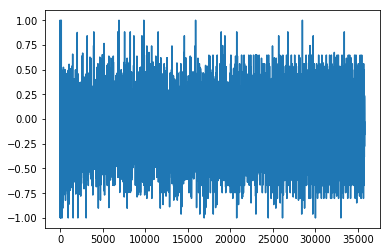

358
1.66424091257
[ 1.          1.          1.          0.44444444  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.22222222  0.33333333  0.77777778  0.77777778  0.77777778
  0.22222222  0.66666667  0.66666667  0.33333333  0.77777778  0.88888889
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-11-01 00:00:00


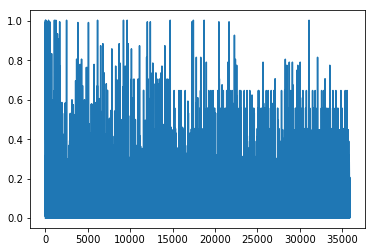

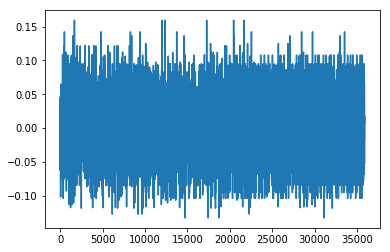

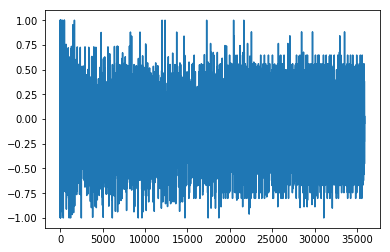

359
1.54734224331
[ 0.66666667  0.11111111  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.11111111  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.33333333  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-12-01 00:00:00


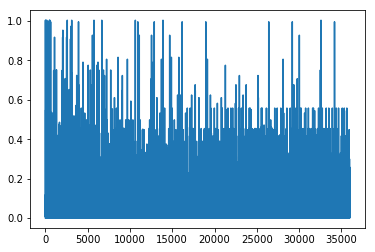

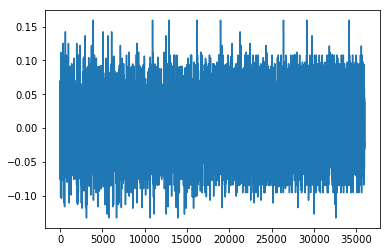

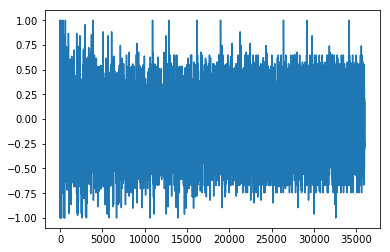

360
1.67125842277
[ 1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  1.          0.77777778  0.77777778
  0.55555556  1.          0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-01-01 00:00:00


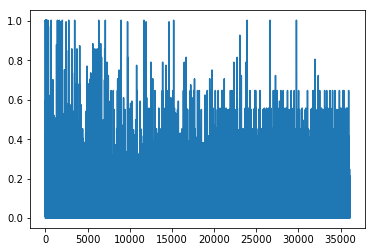

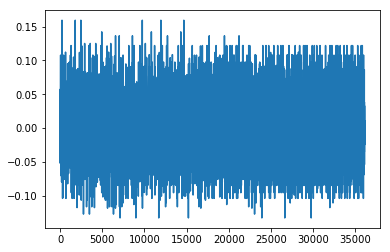

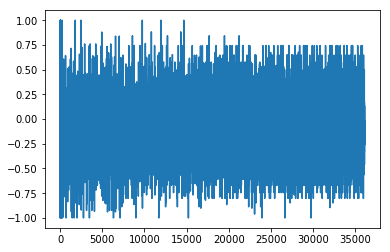

361
1.59535774241
[ 1.          0.77777778  1.          1.          0.77777778  0.77777778
  0.77777778  1.          0.88888889  0.77777778  0.77777778  1.
  0.77777778  1.          0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  1.          0.77777778  1.
  0.77777778  1.          1.          0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.88888889  0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556
  0.66666667  0.66666667  0.88888889  1.          0.77777778  0.77777778
  1.          0.77777778  0.77777778  1.          1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.88888889]
Writing away results
1985-02-01 00:00:00


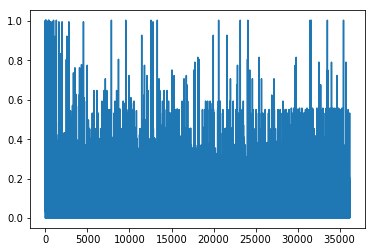

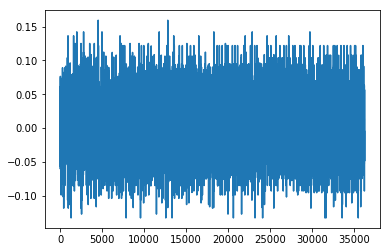

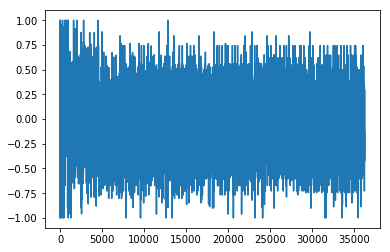

362
1.08189149108
[ 0.77777778  0.55555556  1.          0.88888889  0.          0.77777778
  0.77777778  0.66666667  0.88888889  0.88888889  0.44444444  0.44444444
  0.88888889  0.11111111  0.44444444  0.77777778  0.77777778  0.11111111
  0.88888889  0.          0.44444444  0.66666667  0.          0.88888889
  0.88888889  0.44444444  0.66666667  0.55555556  0.11111111  0.77777778
  0.77777778  1.          0.66666667  0.11111111  0.33333333  0.
  0.44444444  0.66666667  1.          0.66666667  0.77777778  0.77777778
  0.66666667  0.88888889  0.          0.          1.          0.77777778
  0.66666667  0.88888889  0.77777778  0.77777778  0.66666667  0.77777778
  0.77777778  0.44444444  0.77777778  0.77777778  0.55555556]
Writing away results
1985-03-01 00:00:00


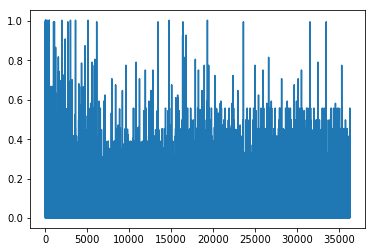

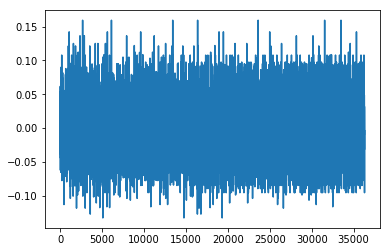

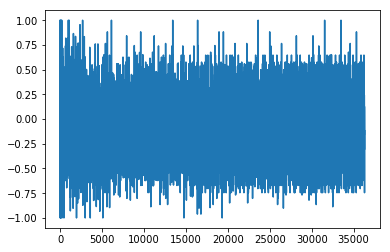

363
1.42908493569
[ 0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.33333333  0.66666667
  0.66666667  0.66666667  0.66666667  0.33333333  0.66666667  0.66666667
  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889  0.22222222
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-04-01 00:00:00


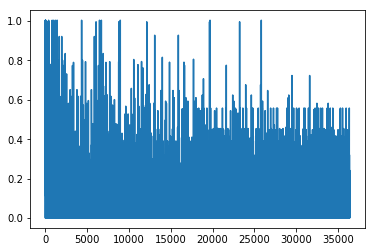

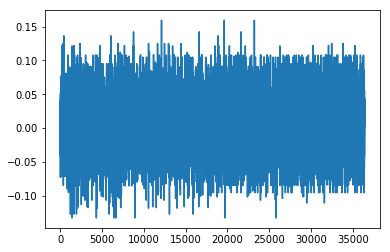

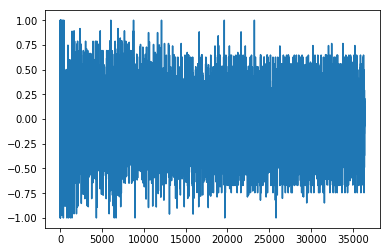

364
1.52108194904
[ 0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.88888889  0.88888889  0.77777778
  0.88888889  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.66666667  0.66666667  0.66666667  0.22222222  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.
  0.88888889  0.88888889  0.77777778  1.          0.77777778  1.
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-05-01 00:00:00


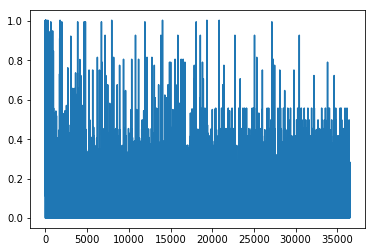

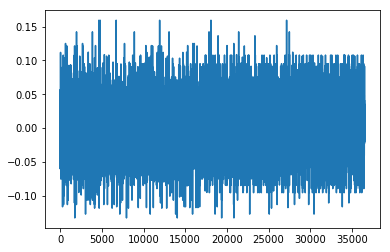

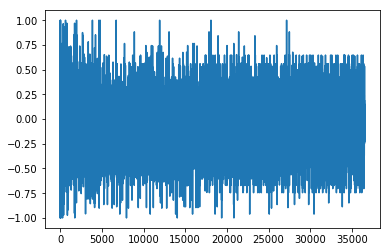

365
1.35910431367
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.66666667  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556  0.77777778
  0.77777778  0.77777778  0.55555556  0.88888889  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-06-01 00:00:00


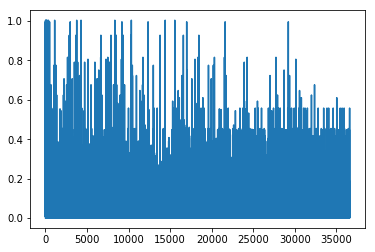

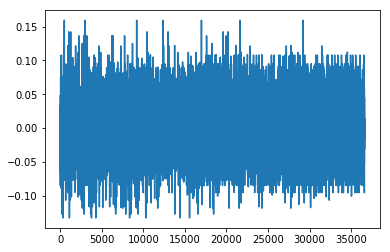

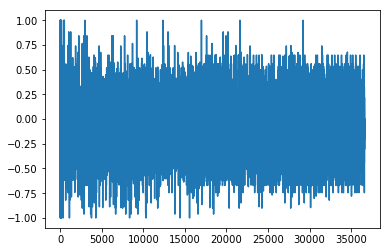

366
1.4353952166
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444  0.66666667
  0.66666667  0.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778
  0.55555556  0.88888889  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-07-01 00:00:00


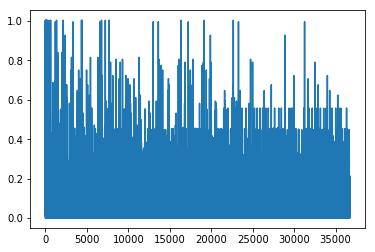

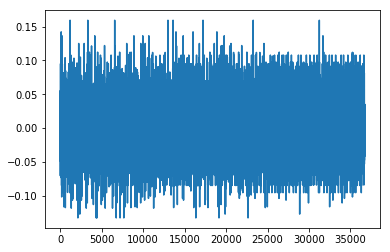

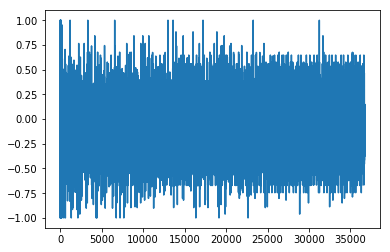

367
1.37798445252
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.22222222  0.22222222
  0.88888889  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.11111111  0.77777778]
Writing away results
1985-08-01 00:00:00


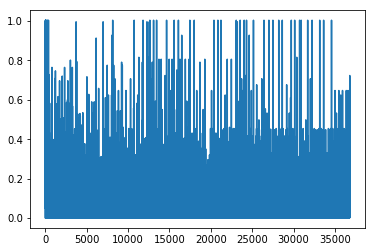

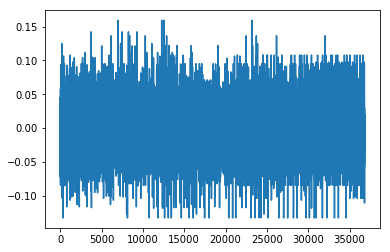

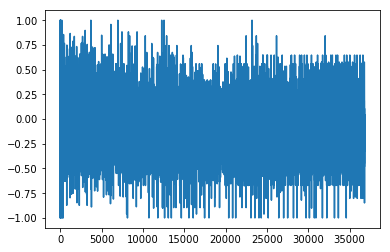

368
1.47850927617
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.88888889  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  1.          0.77777778]
Writing away results
1985-09-01 00:00:00


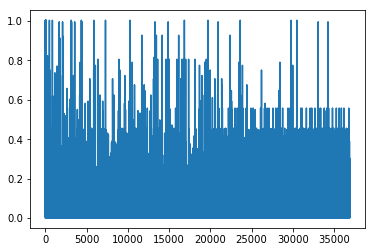

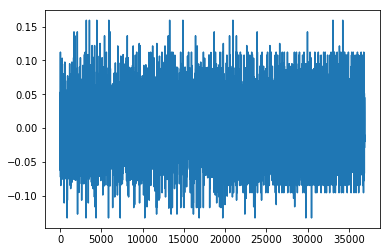

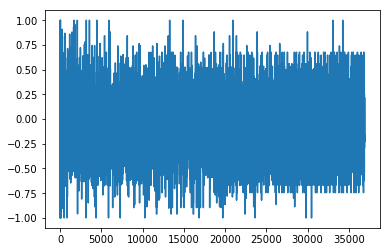

369
1.44550521549
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.11111111  0.66666667  0.66666667  0.66666667  0.33333333
  0.66666667  0.66666667  0.66666667  0.22222222  0.66666667  0.66666667
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  1.
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.44444444  0.77777778  0.66666667  0.66666667]
Writing away results
1985-10-01 00:00:00


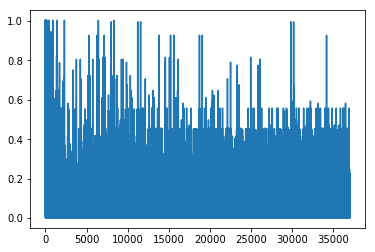

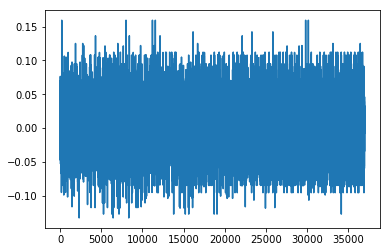

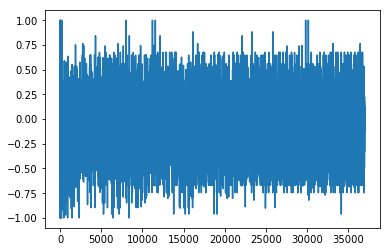

370
1.25044133611
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.11111111  1.          0.66666667  0.66666667  0.66666667]
Writing away results
1985-11-01 00:00:00


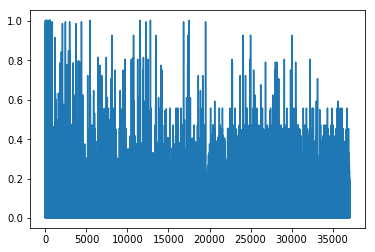

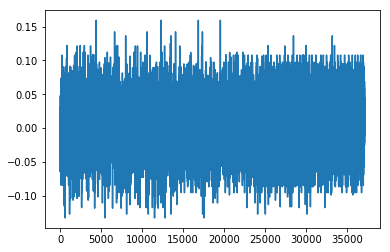

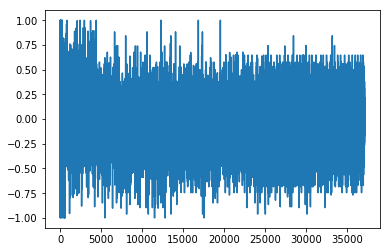

371
1.24657914171
[ 0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.55555556  0.66666667
  0.66666667  0.66666667  0.44444444  0.22222222  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.66666667  0.88888889  0.77777778
  0.77777778  0.77777778  0.88888889  0.55555556  0.77777778  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556  0.11111111
  0.77777778  0.88888889  0.66666667  0.66666667  0.66666667]
Writing away results
1985-12-01 00:00:00


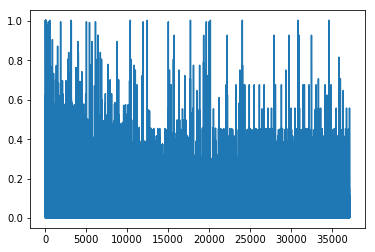

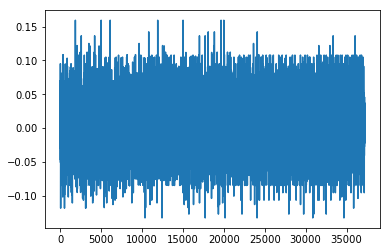

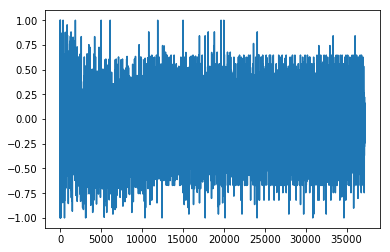

372
1.14139731288
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.11111111  0.22222222
  0.22222222  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778
  0.22222222  0.77777778  0.88888889  0.88888889  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.11111111  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1986-01-01 00:00:00


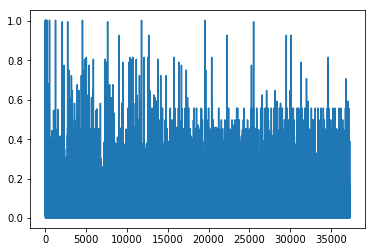

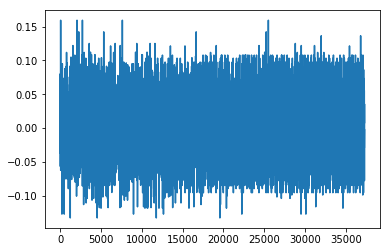

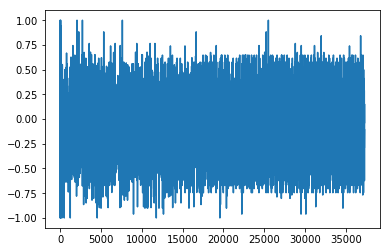

373
1.24838244502
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.11111111  0.66666667  0.66666667
  0.66666667  0.          0.55555556  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.11111111  1.          0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1986-02-01 00:00:00


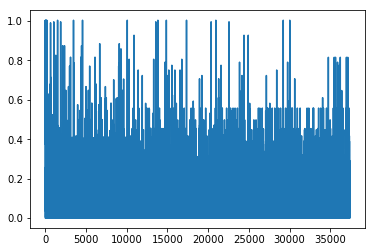

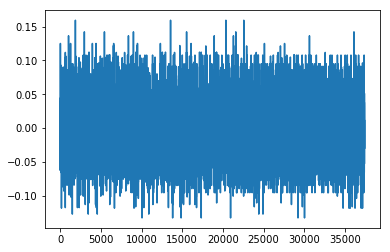

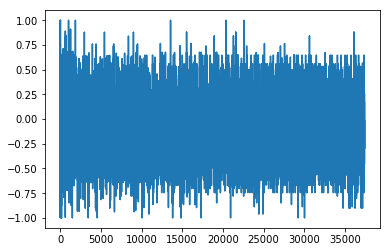

374
1.21180448451
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.22222222  0.66666667  0.66666667  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.          0.66666667
  0.66666667  0.44444444  0.77777778  0.77777778  0.77777778  1.          1.
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.22222222  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778]
Writing away results
1986-03-01 00:00:00


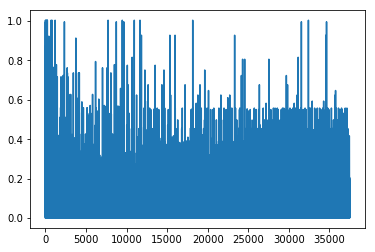

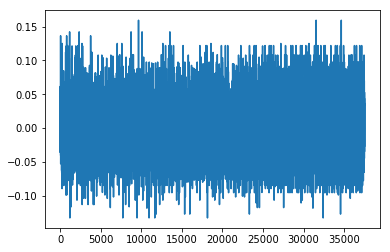

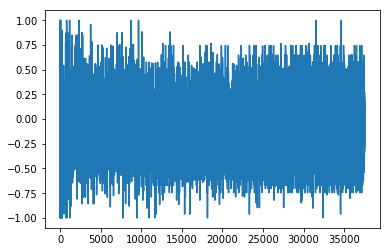

375
1.26478214744
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778
  1.          0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667
  1.          0.77777778  0.77777778  0.77777778  0.55555556  0.22222222
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          1.          1.
  0.22222222  1.          0.44444444  0.22222222  0.66666667  0.66666667
  0.66666667  0.66666667  1.          1.        ]
Writing away results
1986-04-01 00:00:00


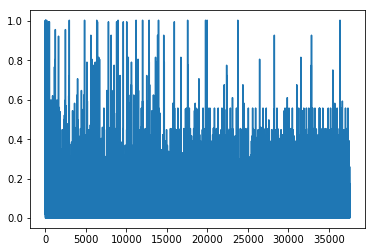

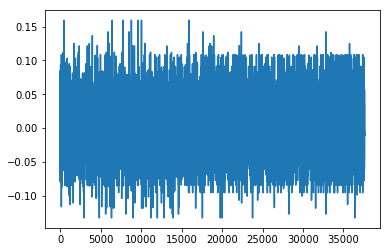

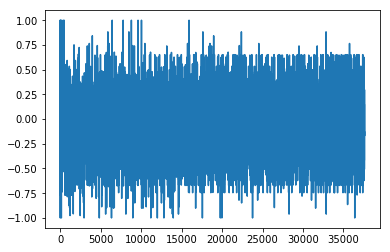

376
1.31556469986
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.66666667  0.66666667  0.11111111  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  1.          0.44444444  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.88888889  0.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.88888889  0.88888889  0.77777778]
Writing away results
1986-05-01 00:00:00


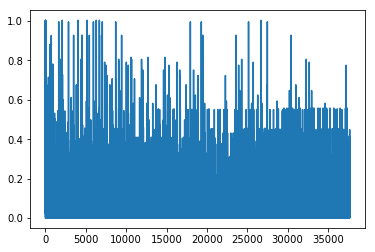

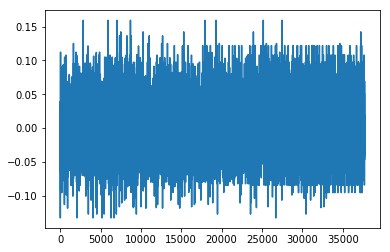

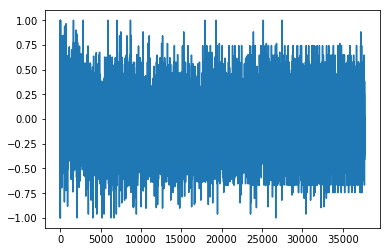

377
1.22562197248
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  1.          0.88888889  0.77777778  0.55555556  0.88888889
  0.33333333  0.77777778  0.77777778  0.77777778  1.          0.22222222
  0.55555556  0.22222222  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889  0.77777778
  0.77777778  1.          0.88888889  0.77777778  1.          0.77777778
  0.77777778  0.88888889  0.88888889  0.77777778  1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.11111111  0.66666667  0.88888889  0.88888889]
Writing away results
1986-06-01 00:00:00


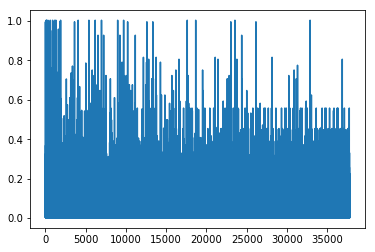

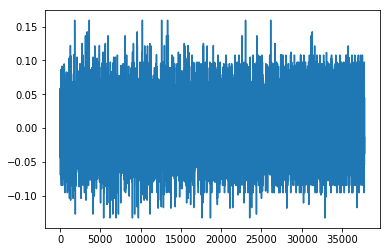

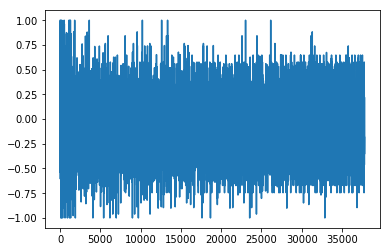

378
1.27262539055
[ 0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.88888889  0.88888889  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222  0.66666667
  0.55555556  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667
  1.          0.66666667  0.66666667  0.88888889  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.77777778  0.88888889  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.77777778  0.88888889  0.88888889  0.44444444  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.88888889  0.88888889  0.88888889]
Writing away results
1986-07-01 00:00:00


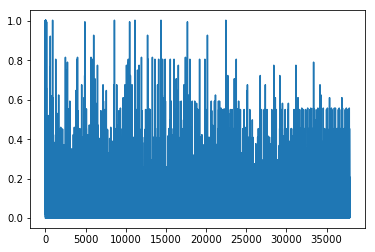

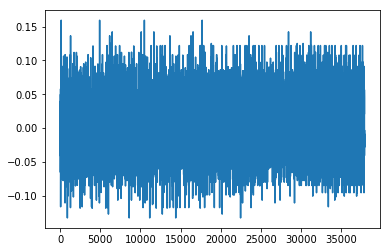

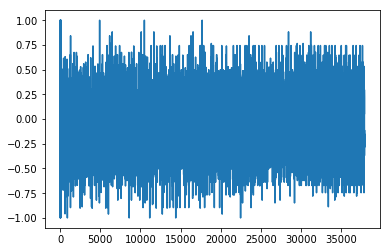

379
1.21017812343
[ 1.          0.77777778  1.          0.77777778  0.77777778  0.88888889
  0.77777778  0.88888889  0.77777778  0.77777778  0.22222222  0.77777778
  0.          0.77777778  1.          0.22222222  0.66666667  0.66666667
  0.22222222  0.44444444  0.66666667  0.66666667  0.66666667  0.55555556
  0.22222222  0.          0.33333333  0.88888889  1.          0.77777778
  0.55555556  0.44444444  0.88888889  0.77777778  0.77777778  0.44444444
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.44444444
  1.          1.          0.88888889  0.22222222  0.77777778  0.55555556
  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444
  0.77777778  0.88888889  0.88888889  0.77777778  0.77777778]
Writing away results
1986-08-01 00:00:00


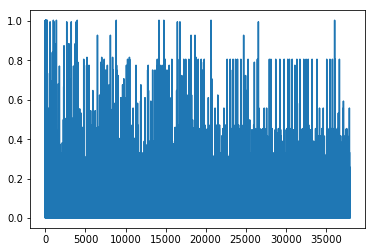

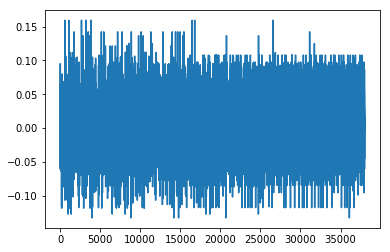

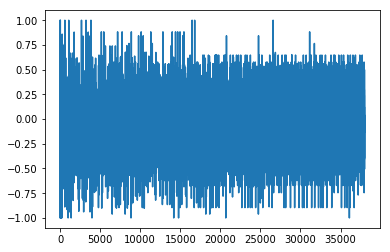

380
1.37280960555
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.          0.66666667  0.66666667  0.77777778
  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  1.          1.          1.
  0.77777778  1.          0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778
  1.          1.          1.          1.          1.        ]
Writing away results
1986-09-01 00:00:00


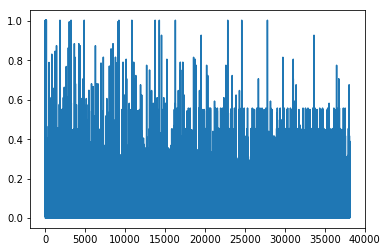

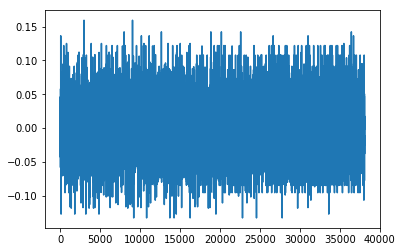

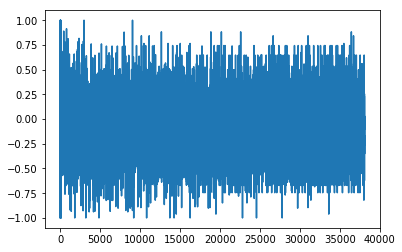

381
1.20375131929
[ 0.77777778  1.          0.77777778  0.77777778  0.33333333  0.88888889
  0.77777778  1.          1.          0.77777778  0.77777778  0.77777778
  1.          0.66666667  0.66666667  0.66666667  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.66666667
  1.          0.77777778  0.77777778  0.33333333  1.          0.77777778
  0.55555556  0.77777778  0.77777778  0.77777778  1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.55555556
  0.88888889  0.22222222  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  1.
  0.33333333  1.          1.          0.77777778  1.        ]
Writing away results
1986-10-01 00:00:00


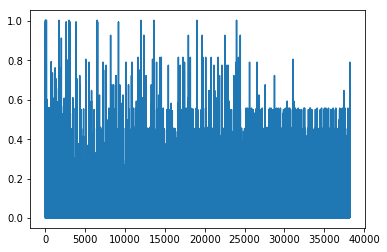

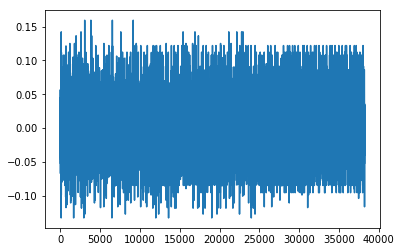

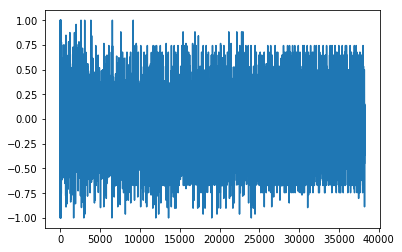

382
1.36936771824
[ 0.77777778  0.77777778  1.          1.          1.          0.77777778
  1.          1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.66666667  0.66666667  0.          0.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889
  0.77777778  0.55555556  0.77777778  1.          0.77777778  0.77777778
  0.77777778  1.          1.          1.          1.          1.
  0.77777778  1.          0.77777778  0.77777778  0.77777778  1.
  0.55555556  0.55555556  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          1.          1.          1.          1.
  1.          1.          1.          0.77777778]
Writing away results
1986-11-01 00:00:00


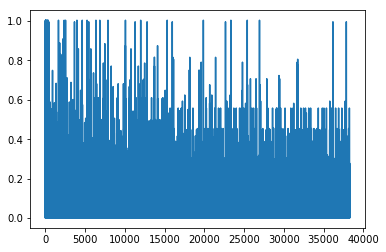

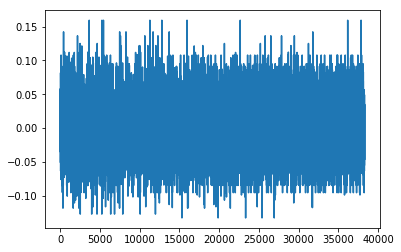

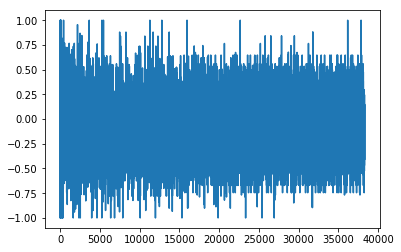

383
1.24706166203
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.          0.66666667  0.66666667  0.66666667
  0.66666667  0.11111111  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  1.          1.          0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.88888889
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.44444444  1.          0.77777778  0.11111111
  0.77777778  1.          0.77777778  0.77777778  0.77777778]
Writing away results
1986-12-01 00:00:00


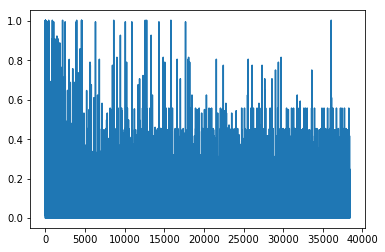

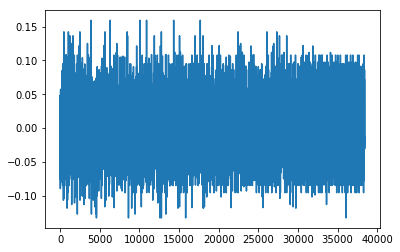

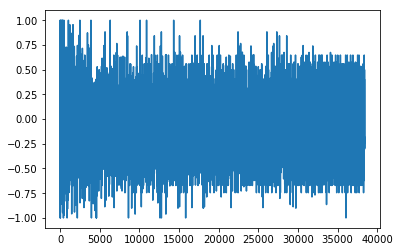

384
1.18221708112
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.33333333  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.33333333  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.33333333  0.11111111  0.77777778  0.77777778  0.77777778  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-01-01 00:00:00


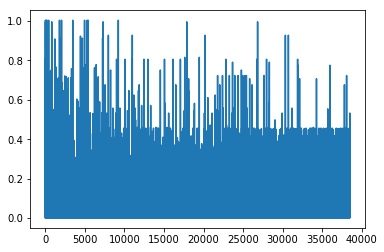

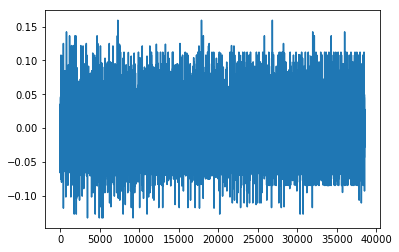

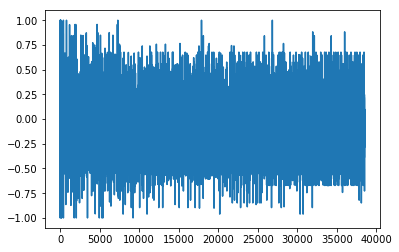

385
1.22462989114
[ 1.          1.          0.55555556  0.22222222  0.          0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.33333333
  1.          0.66666667  0.66666667  0.66666667  0.66666667  0.33333333
  0.66666667  0.66666667  0.77777778  0.77777778  0.11111111  0.44444444
  1.          1.          0.77777778  1.          1.          0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  1.          0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.
  0.22222222  1.          1.          1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-02-01 00:00:00


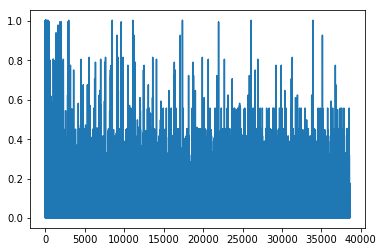

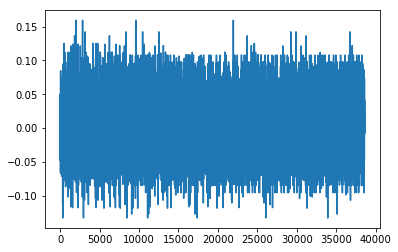

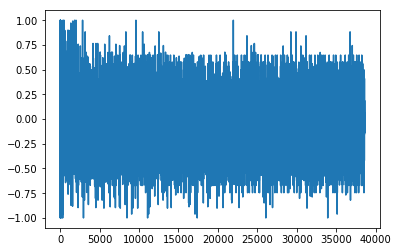

386
1.12211142613
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667  0.55555556
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.33333333  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333  0.
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-03-01 00:00:00


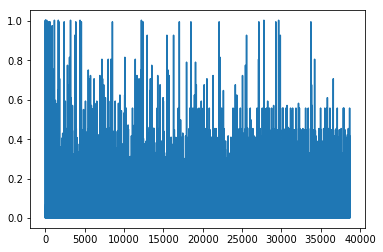

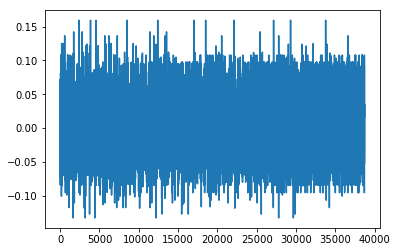

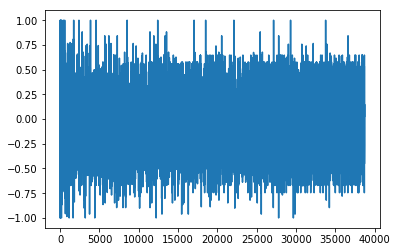

387
1.19627246777
[ 0.77777778  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.55555556  0.22222222  0.77777778
  0.66666667  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667
  0.44444444  0.77777778  0.77777778  0.88888889  0.44444444  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.11111111  0.44444444  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778]
Writing away results
1987-04-01 00:00:00


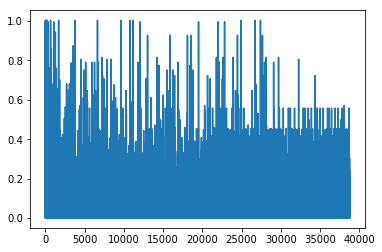

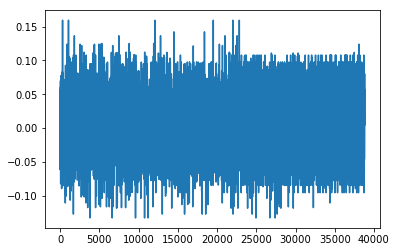

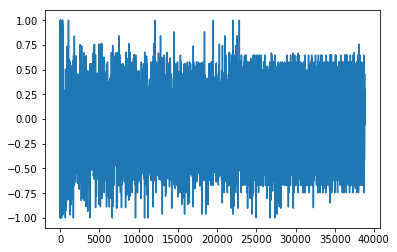

388
1.20159212123
[ 0.88888889  1.          0.88888889  0.77777778  0.77777778  0.77777778
  0.44444444  0.66666667  0.          0.          0.66666667  0.66666667
  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667  0.88888889
  0.77777778  0.77777778  0.88888889  1.          0.77777778  0.88888889
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.33333333
  0.33333333  0.88888889  1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.66666667  1.          0.77777778
  0.88888889  0.88888889  1.          0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778]
Writing away results
1987-05-01 00:00:00


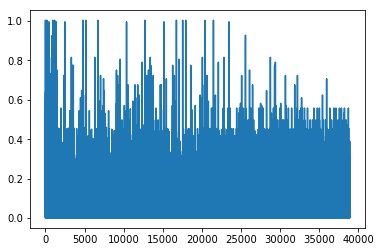

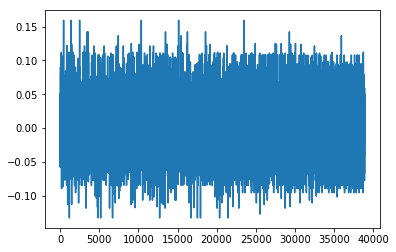

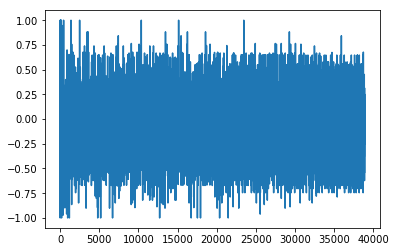

389
1.23158423225
[ 1.          0.77777778  0.77777778  0.77777778  0.77777778  0.33333333
  0.33333333  0.66666667  0.22222222  0.22222222  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.88888889  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.77777778  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.22222222  0.88888889  0.55555556  1.          1.          1.
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-06-01 00:00:00


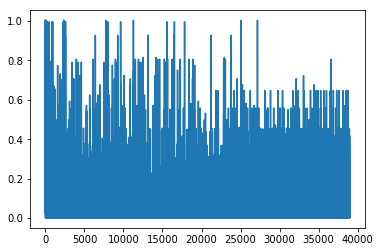

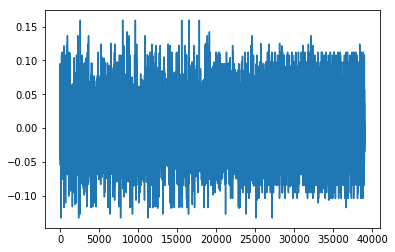

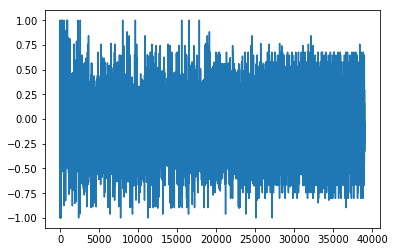

390
1.14481557774
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.
  0.66666667  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  1.          0.77777778
  0.22222222  0.66666667  0.77777778  0.44444444  1.          1.
  0.77777778  1.          0.77777778  0.88888889  0.77777778  1.
  0.77777778  0.77777778  0.77777778  1.          0.77777778  1.
  0.66666667  1.          0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  1.          1.          1.          1.          0.66666667
  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778  1.          1.
  1.          0.77777778  0.77777778  0.22222222]
Writing away results
1987-07-01 00:00:00


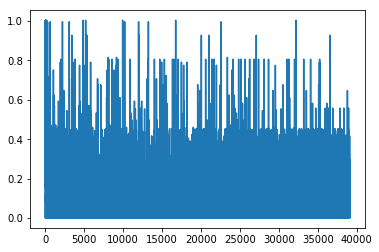

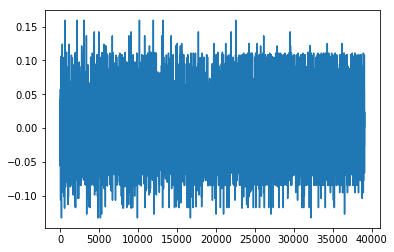

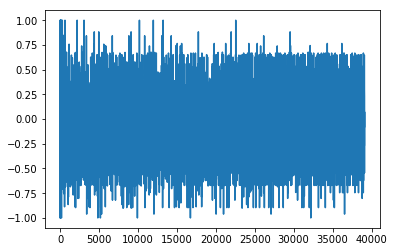

391
1.12059012714
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.44444444  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.77777778  0.77777778  0.77777778
  0.66666667  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  1.          0.77777778  0.77777778  1.          0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111
  0.66666667  1.          0.55555556  1.          1.          0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.88888889  1.          0.55555556  1.        ]
Writing away results
1987-08-01 00:00:00


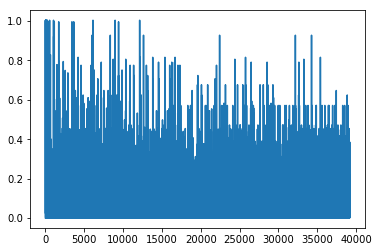

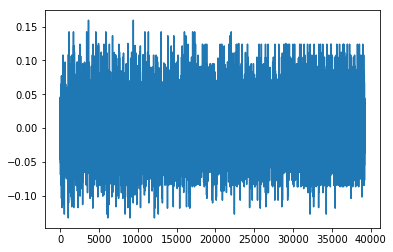

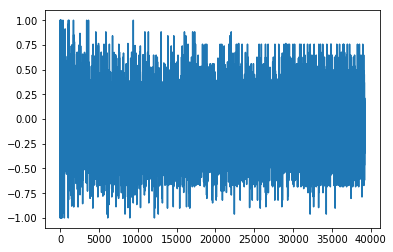

392
1.16310676147
[ 0.44444444  0.77777778  0.          0.11111111  0.11111111  0.44444444
  0.          0.66666667  0.66666667  0.66666667  0.88888889  0.44444444
  0.66666667  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889
  1.          0.77777778  0.77777778  1.          0.88888889  0.77777778
  1.          1.          0.77777778  1.          1.          1.
  0.77777778  0.77777778  0.66666667  0.77777778  0.88888889  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444  0.77777778
  0.88888889  1.          0.88888889  1.          1.          1.
  0.77777778  1.          0.77777778  1.          1.          0.77777778
  1.          0.77777778  1.          0.88888889  1.        ]
Writing away results
1987-09-01 00:00:00


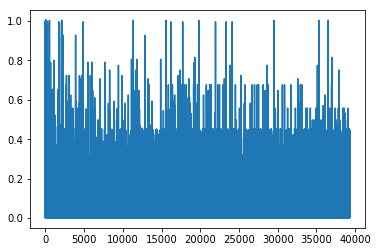

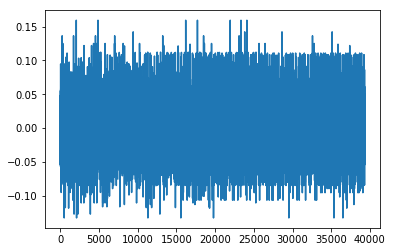

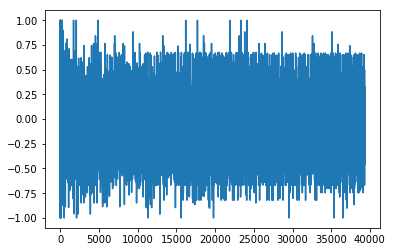

393
1.12825165119
[ 0.77777778  0.66666667  0.66666667  0.          0.          0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.88888889
  0.88888889  0.77777778  0.88888889  0.77777778  0.88888889  0.77777778
  0.88888889  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.          0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.77777778  0.77777778
  0.88888889  0.77777778  0.88888889  0.77777778  0.88888889  0.88888889
  0.77777778  0.88888889  0.77777778  0.88888889  0.77777778]
Writing away results
1987-10-01 00:00:00


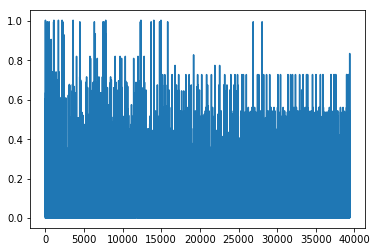

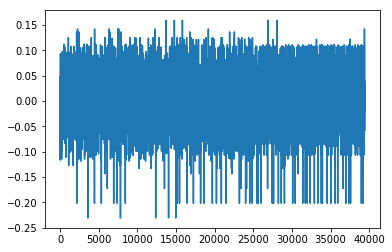

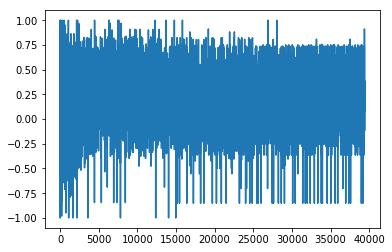

394
1.41358213029
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.66666667  0.66666667
  0.66666667  0.88888889  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1987-11-01 00:00:00


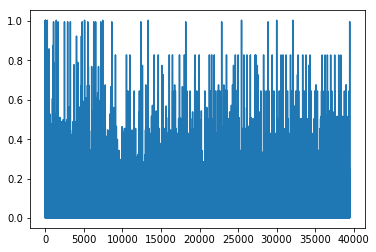

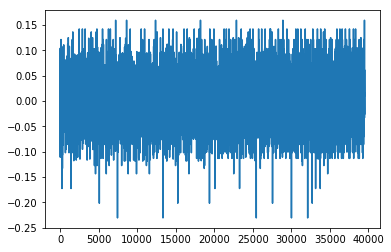

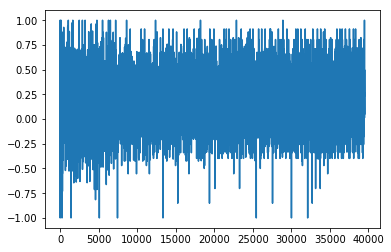

395
1.49184309892
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.88888889
  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1987-12-01 00:00:00


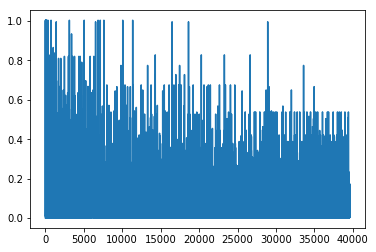

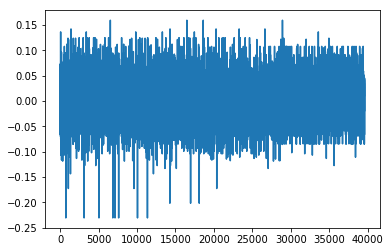

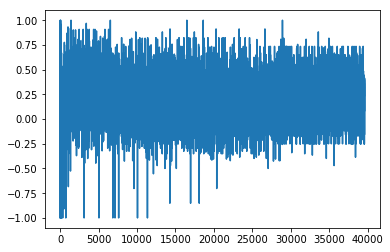

396
1.33924988244
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.66666667  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222]
Writing away results
1988-01-01 00:00:00


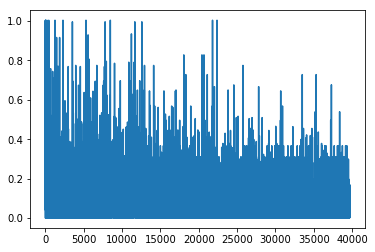

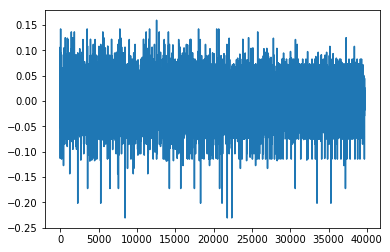

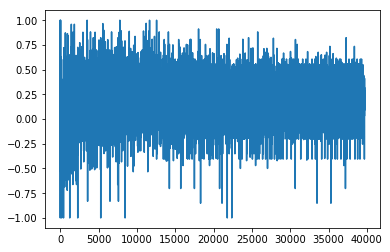

397
1.34323620375
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.55555556
  0.44444444  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.44444444  0.55555556  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1988-02-01 00:00:00


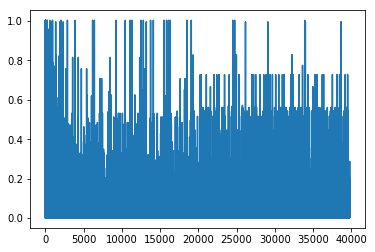

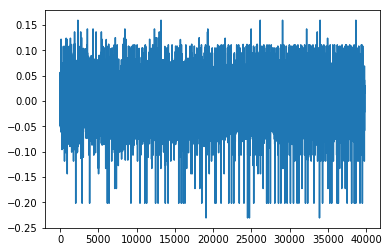

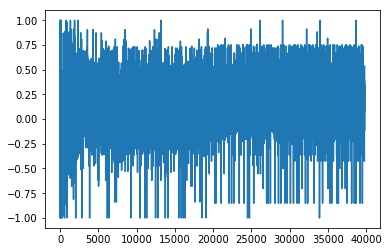

398
1.31799078813
[ 0.          0.          0.          0.          0.88888889  0.          0.
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.          0.
  0.          0.88888889  0.88888889  0.          0.          0.          0.
  0.          0.          0.          0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889]
Writing away results
1988-03-01 00:00:00


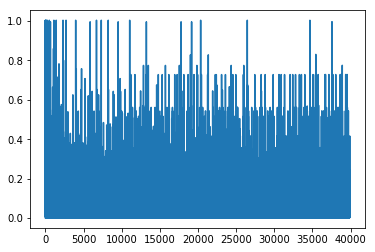

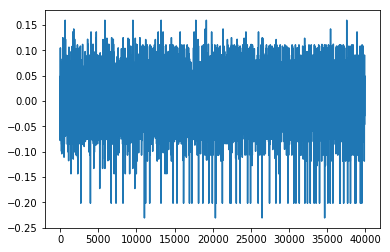

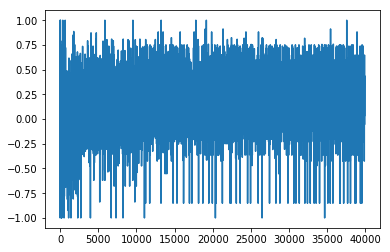

399
1.41168841639
[ 0.55555556  0.55555556  0.55555556  0.88888889  0.55555556  0.55555556
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.55555556
  0.88888889  0.55555556  0.88888889  0.88888889  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1988-04-01 00:00:00


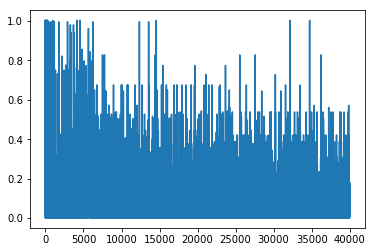

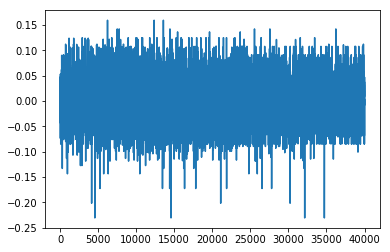

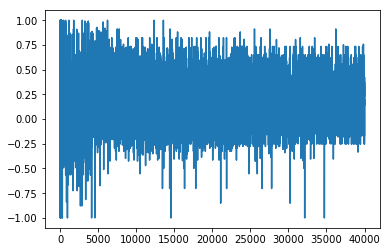

400
1.36512409374
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.66666667  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Writing away results
1988-05-01 00:00:00


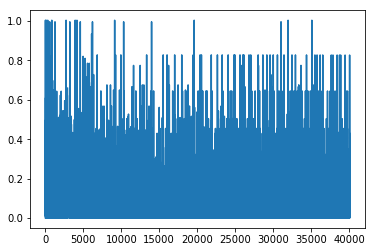

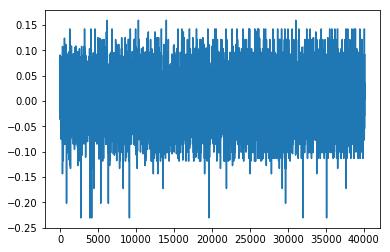

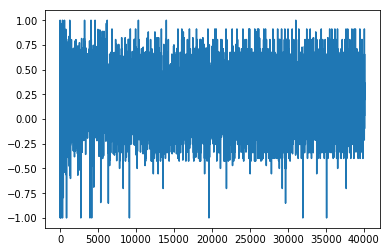

401
1.40049535961
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.88888889
  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1988-06-01 00:00:00


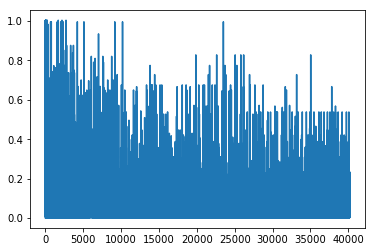

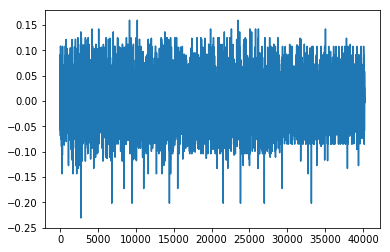

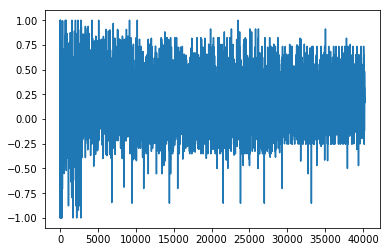

402
1.24233319924
[ 0.66666667  0.66666667  0.66666667  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111]
Writing away results
1988-07-01 00:00:00


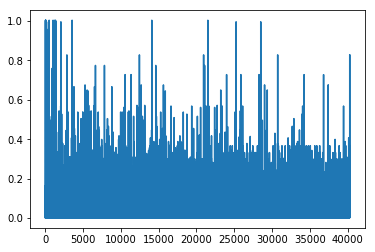

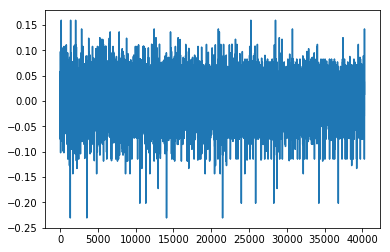

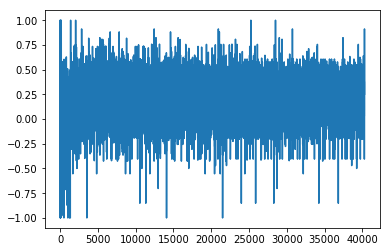

403
1.38008334263
[ 0.33333333  0.33333333  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.33333333  0.55555556  0.55555556
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1988-08-01 00:00:00


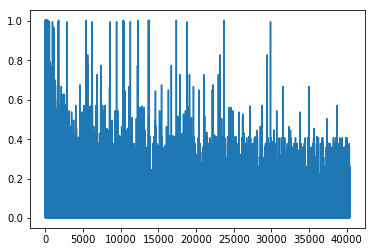

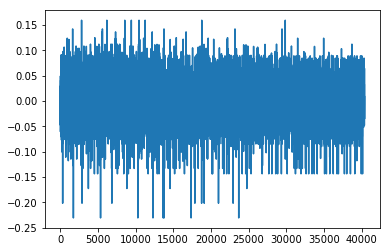

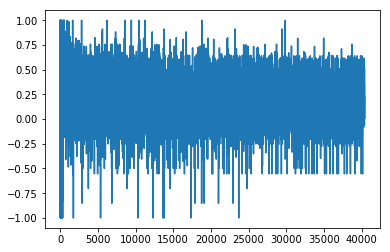

404
1.40992678773
[ 0.11111111  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.11111111  0.66666667  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1988-09-01 00:00:00


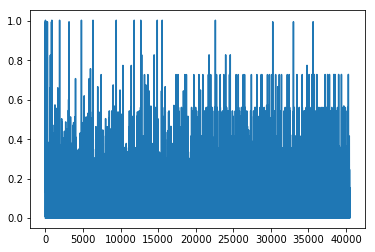

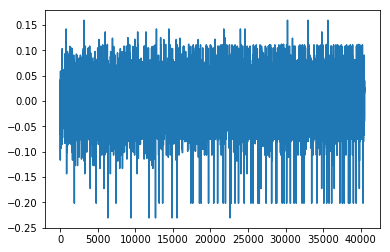

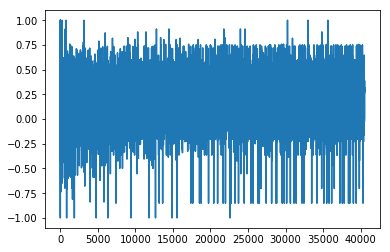

405
1.49813316866
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.55555556  0.88888889  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1988-10-01 00:00:00


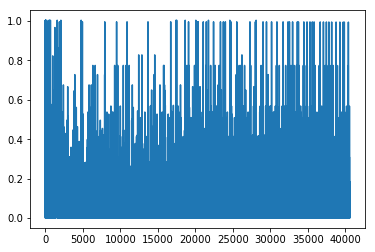

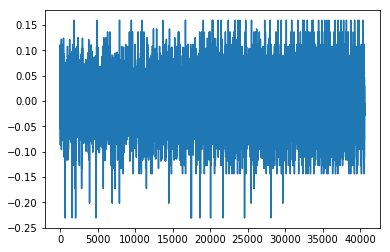

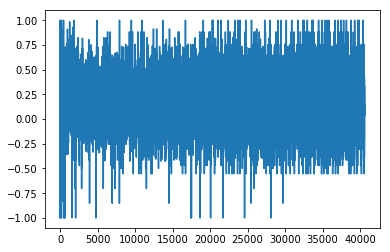

406
1.45558177781
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  1.          0.66666667  1.          1.          1.          1.          1.
  1.          1.          1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1988-11-01 00:00:00


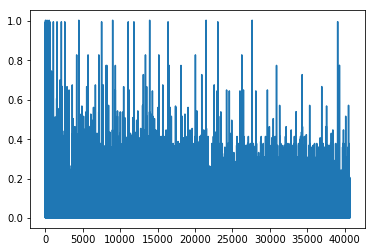

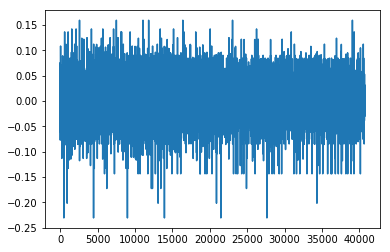

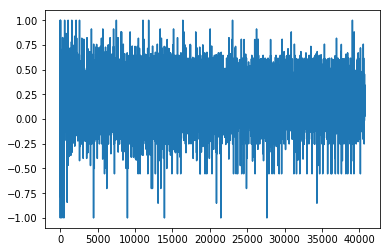

407
1.4635259477
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222
  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1988-12-01 00:00:00


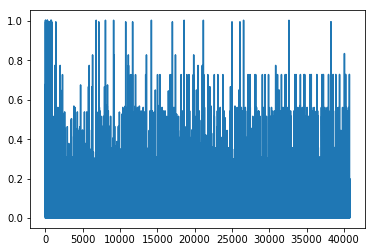

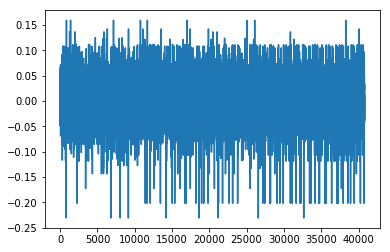

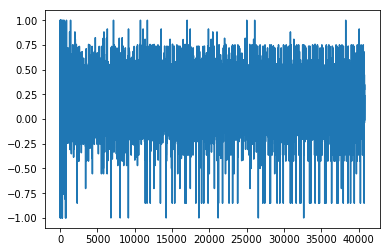

408
1.46464613664
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444  0.88888889
  0.88888889  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1989-01-01 00:00:00


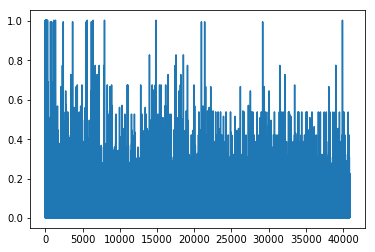

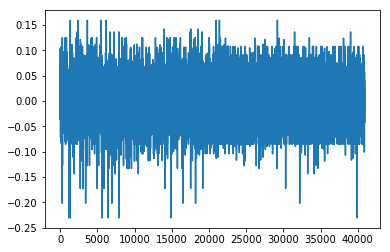

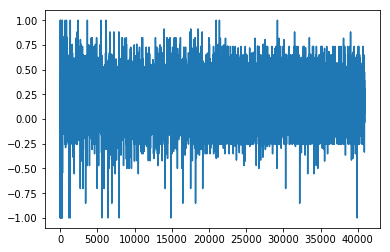

409
1.36291801704
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1989-02-01 00:00:00


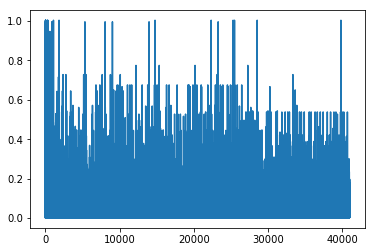

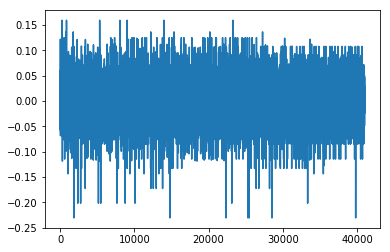

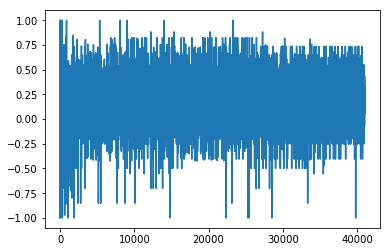

410
1.45385502824
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.66666667  0.55555556  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1989-03-01 00:00:00


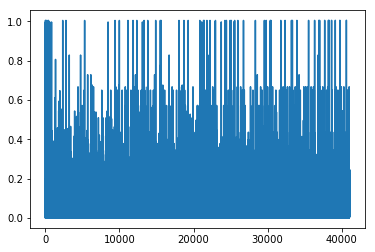

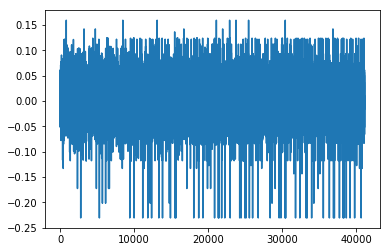

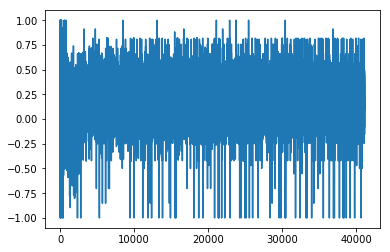

411
1.47492987572
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          0.44444444
  0.44444444  1.          0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.        ]
Writing away results
1989-04-01 00:00:00


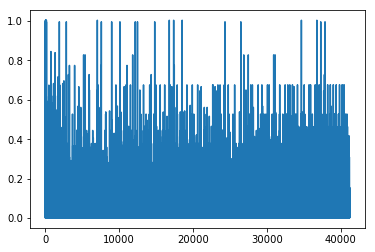

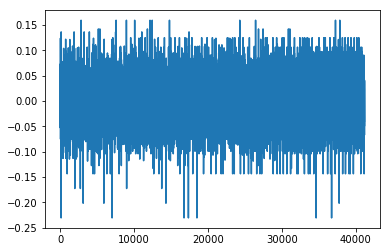

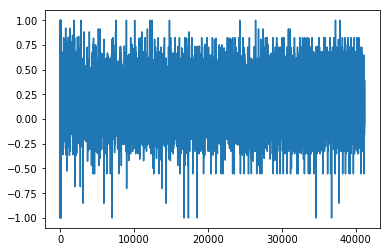

412
1.40679709581
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.77777778  0.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1989-05-01 00:00:00


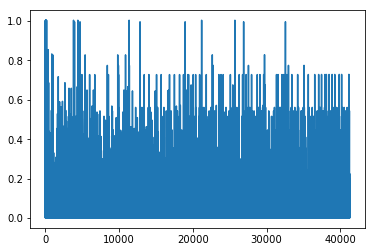

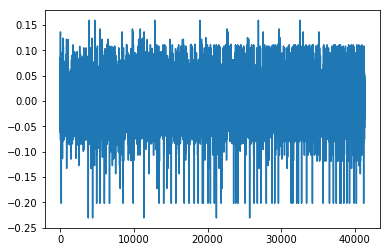

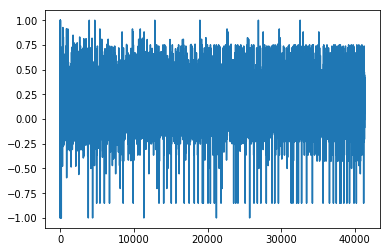

413
1.22285600725
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.
  0.88888889  0.88888889  0.          0.          0.          0.          0.
  0.          0.          0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.        ]
Writing away results
1989-06-01 00:00:00


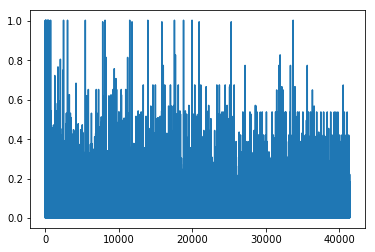

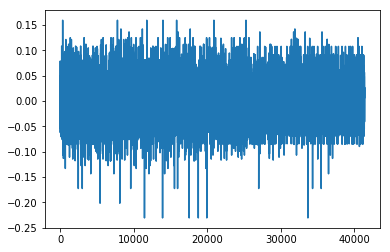

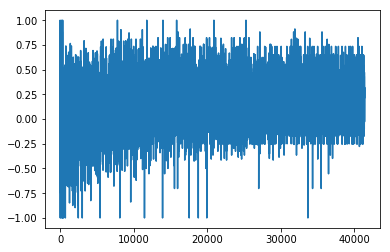

414
1.24141545415
[ 0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.66666667  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222]
Writing away results
1989-07-01 00:00:00


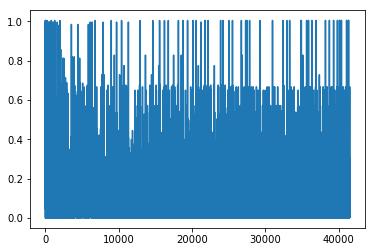

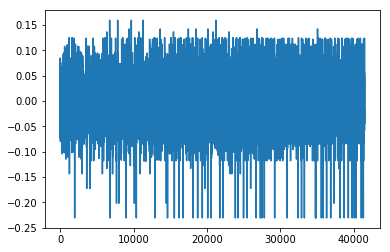

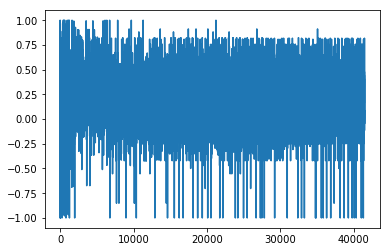

415
1.19077735736
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.66666667  1.          0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.66666667  0.66666667  1.        ]
Writing away results
1989-08-01 00:00:00


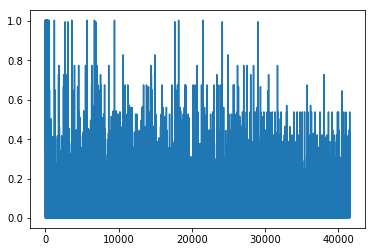

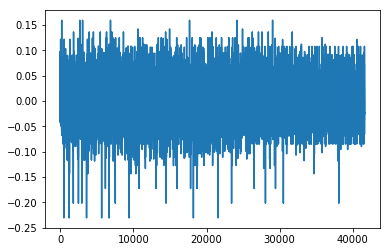

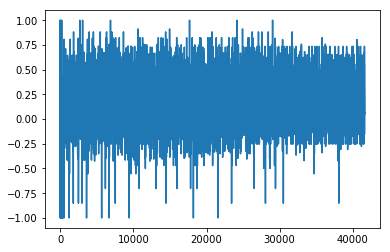

416
1.23688237752
[ 0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.66666667  0.22222222  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.66666667]
Writing away results
1989-09-01 00:00:00


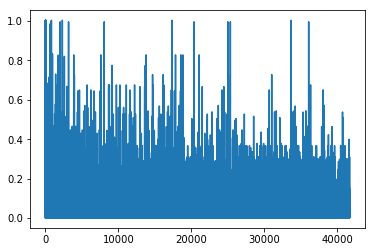

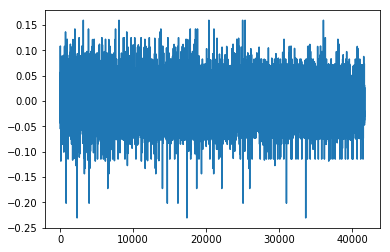

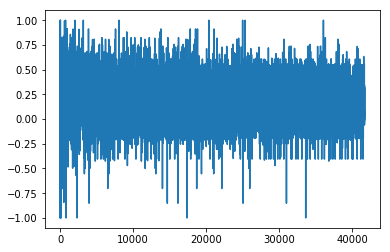

417
1.23958681839
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.44444444  0.55555556  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.44444444  0.55555556  0.44444444  0.44444444]
Writing away results
1989-10-01 00:00:00


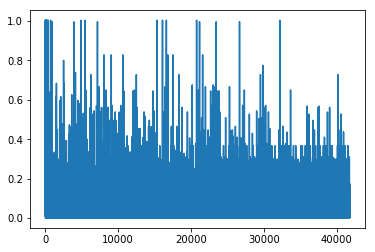

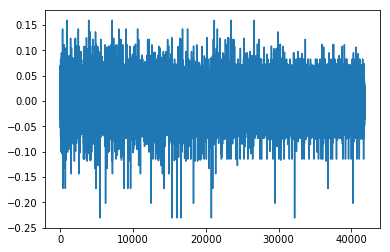

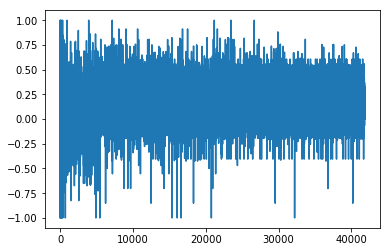

418
1.22637841335
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.44444444  0.55555556  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.44444444
  0.44444444  0.55555556  0.44444444  0.44444444  0.44444444]
Writing away results
1989-11-01 00:00:00


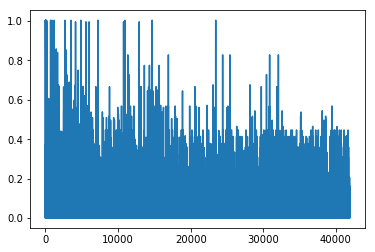

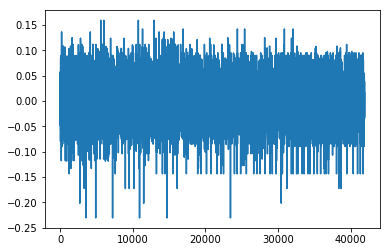

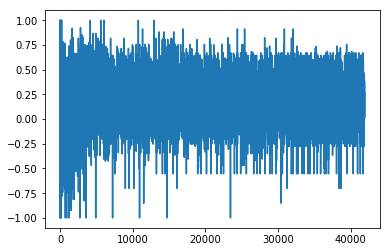

419
1.15127190475
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.
  0.66666667  0.          0.          0.          0.          0.          0.
  0.          0.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.          0.          0.66666667
  0.          0.          0.          0.        ]
Writing away results
1989-12-01 00:00:00


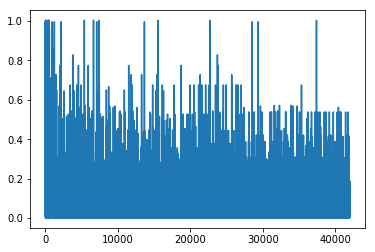

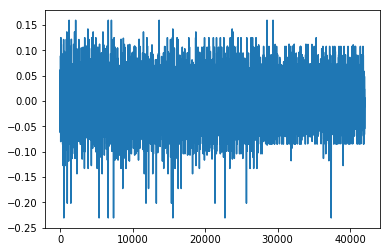

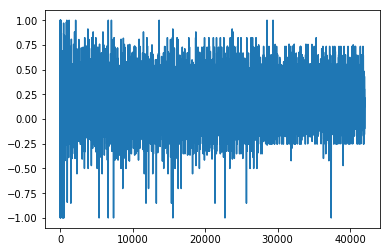

420
1.20327793647
[ 0.22222222  0.22222222  0.22222222  0.22222222  0.66666667  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1990-01-01 00:00:00


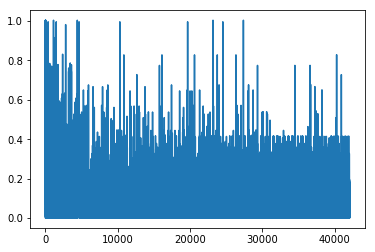

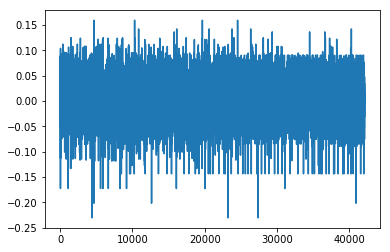

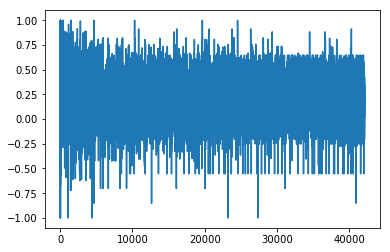

421
1.26786536159
[ 0.66666667  0.66666667  0.66666667  0.55555556  0.55555556  0.66666667
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.55555556  0.55555556  0.66666667  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1990-02-01 00:00:00


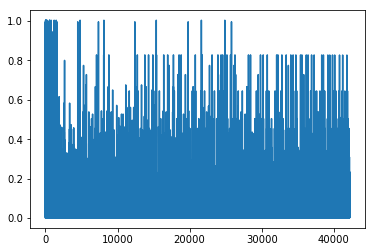

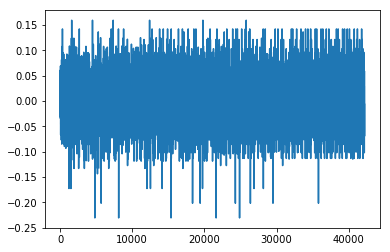

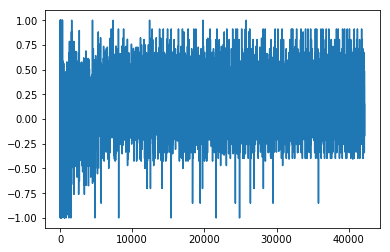

422
1.31764083482
[ 0.11111111  0.11111111  0.88888889  0.11111111  0.11111111  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.88888889  0.11111111  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1990-03-01 00:00:00


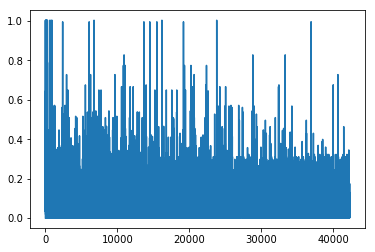

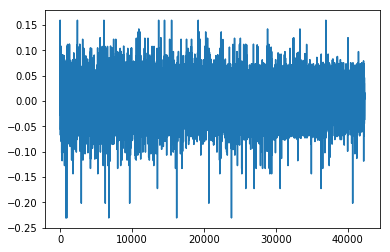

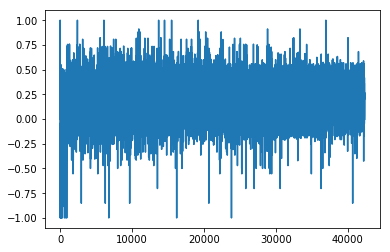

423
1.27250251616
[ 0.          0.44444444  0.          0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1990-04-01 00:00:00


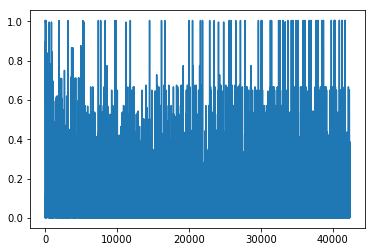

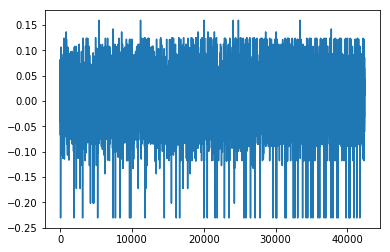

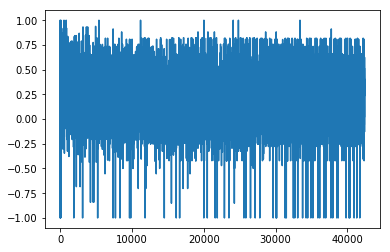

424
1.40543191591
[ 0.66666667  1.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.66666667  1.          1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.        ]
Writing away results
1990-05-01 00:00:00


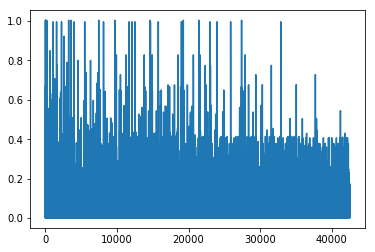

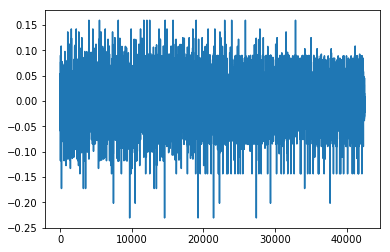

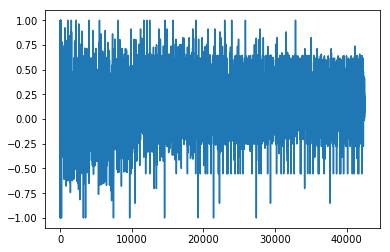

425
1.28649711958
[ 0.66666667  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111  0.66666667
  0.66666667  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.66666667  0.66666667]
Writing away results
1990-06-01 00:00:00


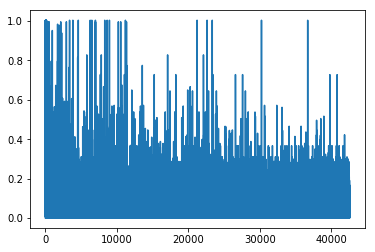

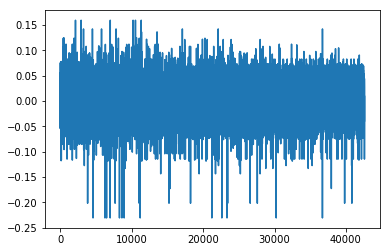

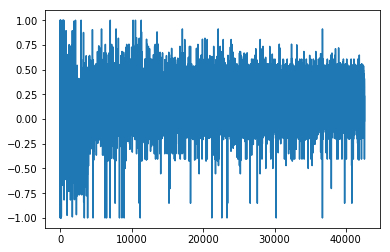

426
1.34045187971
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.44444444  0.44444444  0.55555556
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.55555556  0.55555556  0.55555556]
Writing away results
1990-07-01 00:00:00


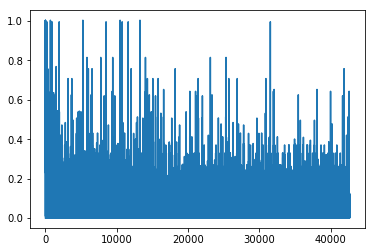

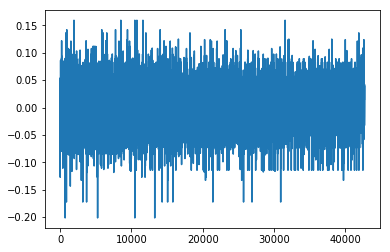

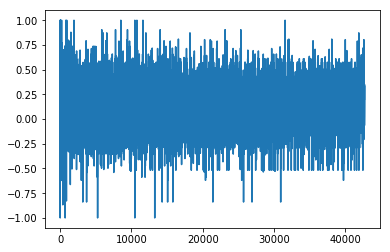

427
1.33903740766
[ 0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.11111111  0.55555556  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1990-08-01 00:00:00


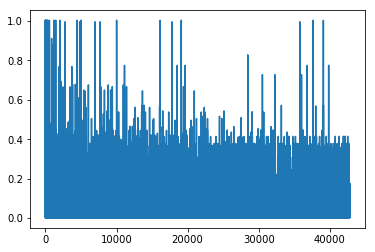

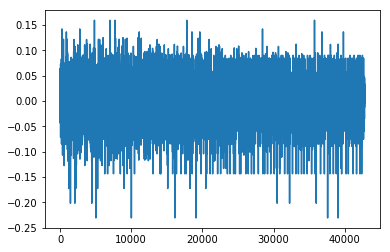

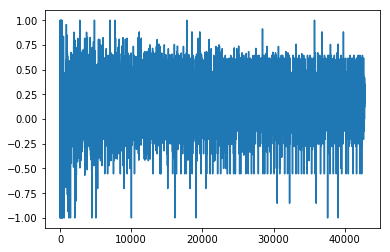

428
1.44549911371
[ 0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1990-09-01 00:00:00


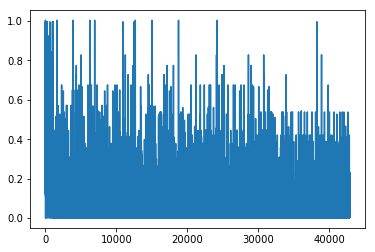

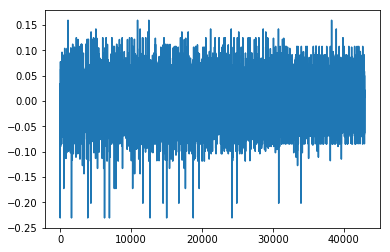

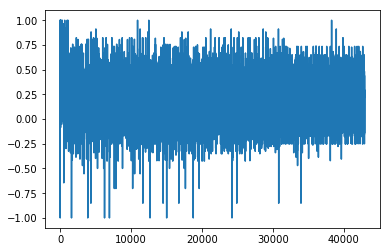

429
1.47562046841
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.66666667  0.11111111  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111]
Writing away results
1990-10-01 00:00:00


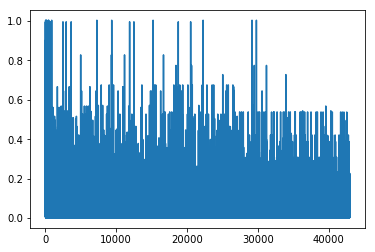

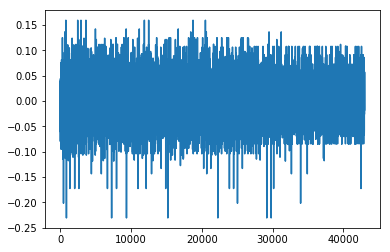

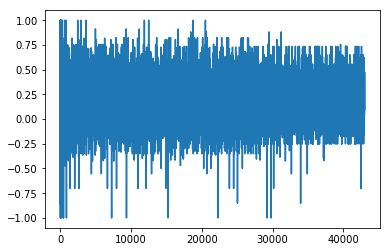

430
1.52664183918
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.66666667  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222]
Writing away results
1990-11-01 00:00:00


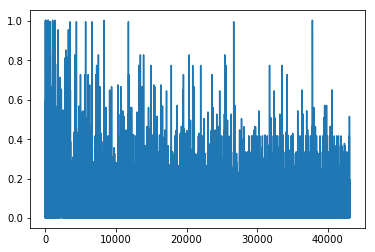

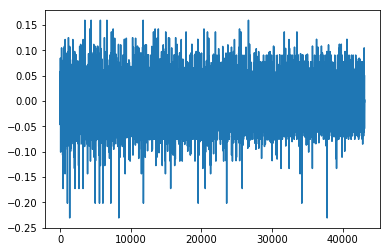

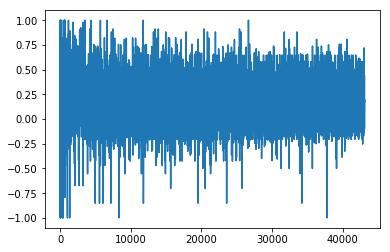

431
1.38452222069
[ 0.55555556  0.55555556  0.55555556  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.55555556  0.          0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.          0.          0.
  0.          0.          0.          0.          0.        ]
Writing away results
1990-12-01 00:00:00


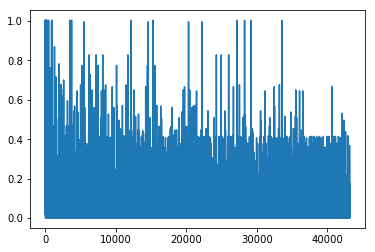

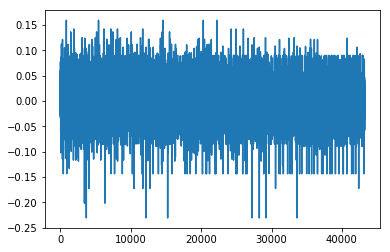

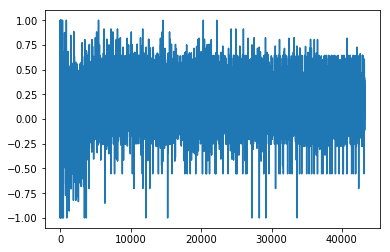

432
1.42816617218
[ 0.11111111  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.11111111  0.11111111  0.55555556
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-01-01 00:00:00


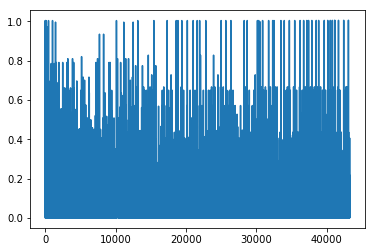

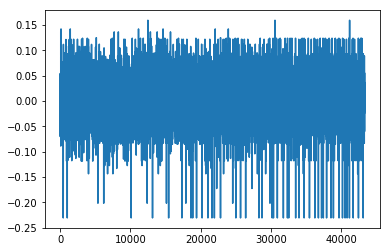

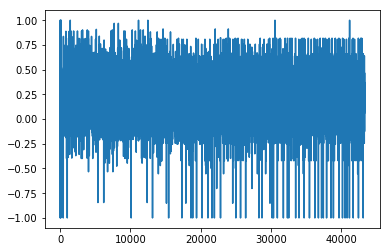

433
1.52185181228
[ 0.11111111  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.11111111  1.          1.
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.        ]
Writing away results
1991-02-01 00:00:00


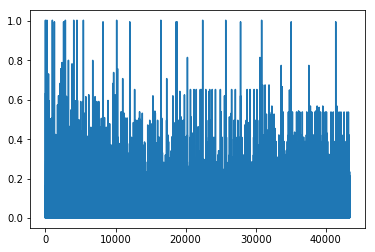

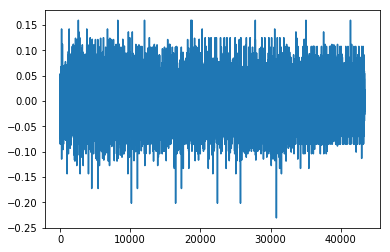

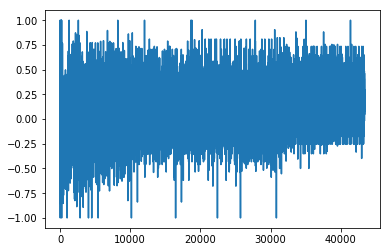

434
1.44179039093
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.66666667  0.44444444  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1991-03-01 00:00:00


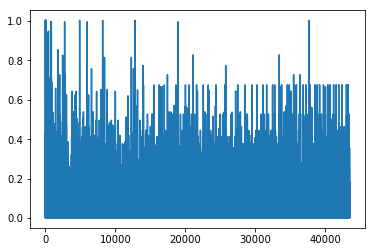

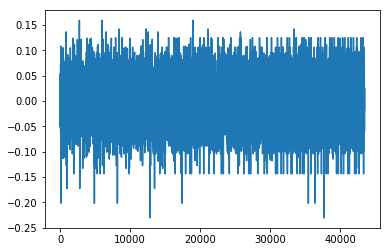

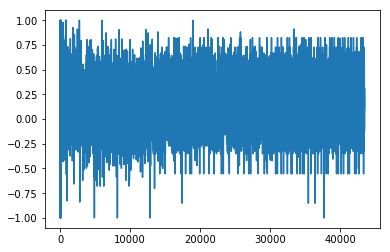

435
1.5135003985
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.55555556  0.77777778  0.77777778  0.11111111
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-04-01 00:00:00


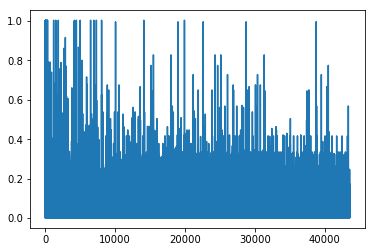

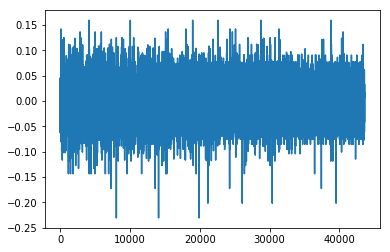

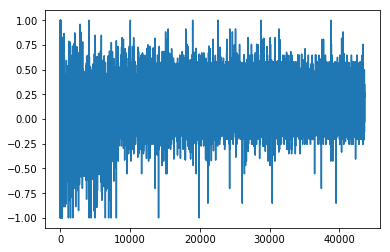

436
1.39981255028
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.55555556  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1991-05-01 00:00:00


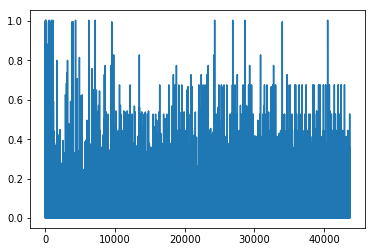

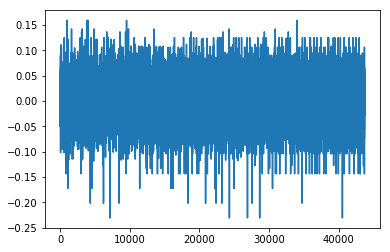

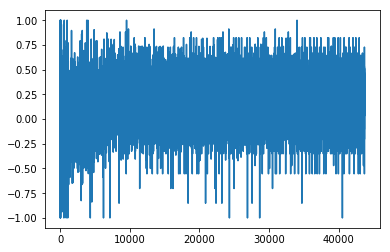

437
1.48292015852
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667
  0.66666667  0.77777778  0.77777778  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-06-01 00:00:00


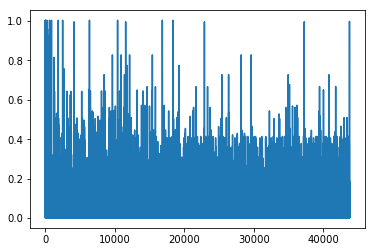

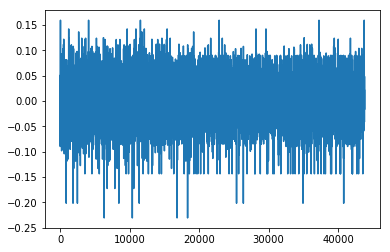

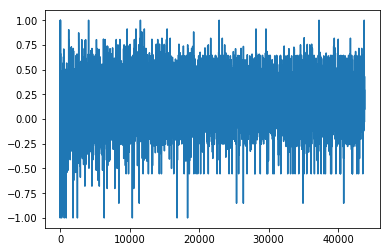

438
1.46219864553
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.66666667  0.11111111
  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-07-01 00:00:00


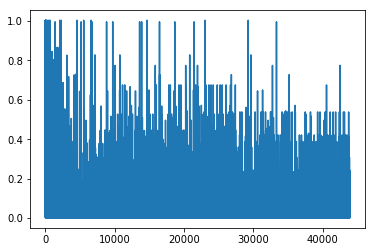

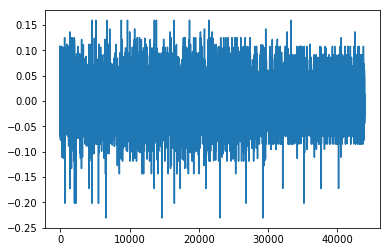

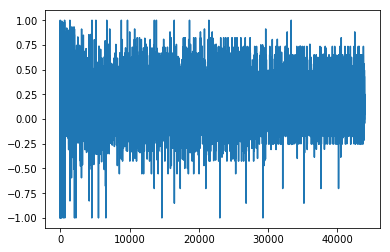

439
1.24165106999
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
Writing away results
1991-08-01 00:00:00


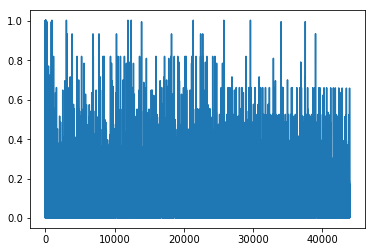

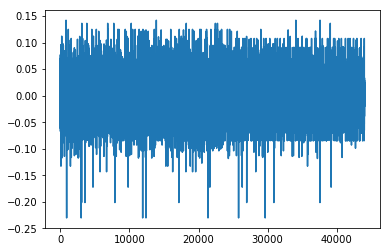

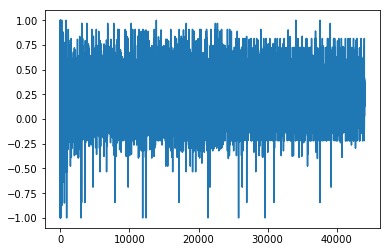

440
1.32825626358
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1991-09-01 00:00:00


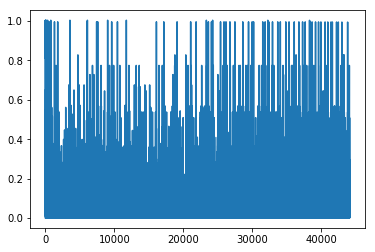

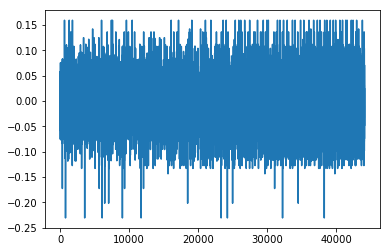

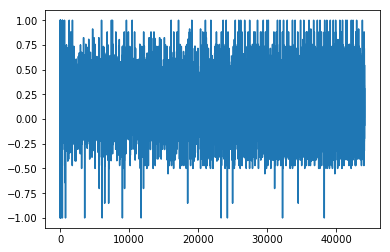

441
1.41765754205
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  1.          0.55555556  1.          1.          1.          1.
  1.          1.          1.          1.          0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1991-10-01 00:00:00


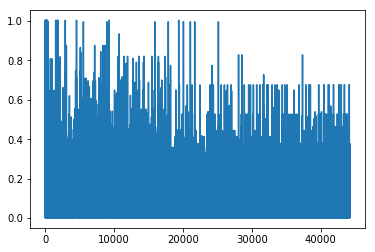

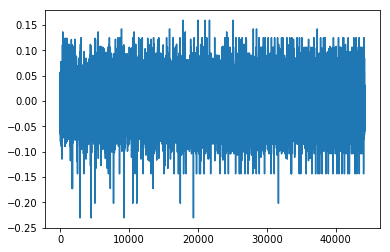

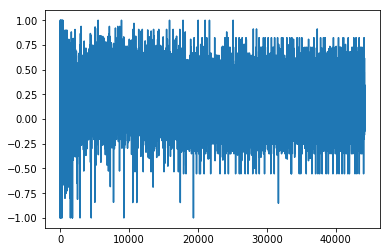

442
1.46361083516
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.66666667  1.          0.77777778  0.77777778  0.66666667  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-11-01 00:00:00


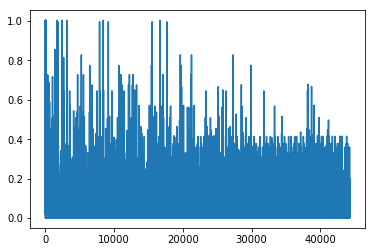

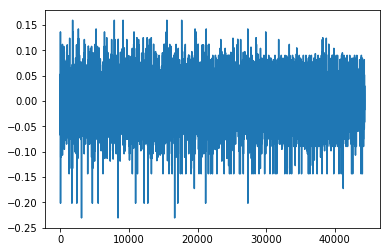

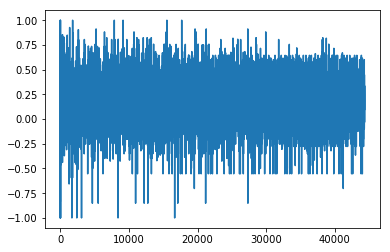

443
1.47218496601
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333  0.33333333
  0.66666667  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1991-12-01 00:00:00


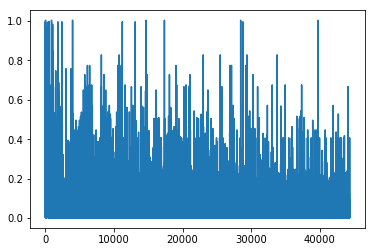

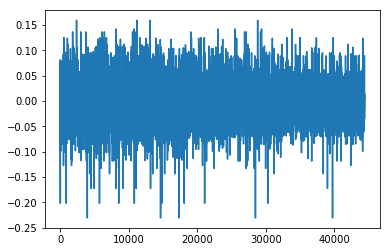

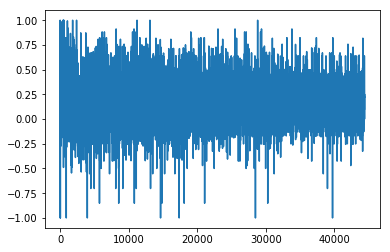

444
1.14243924904
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
Writing away results
1992-01-01 00:00:00


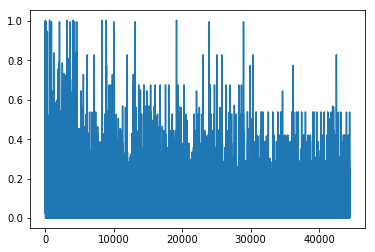

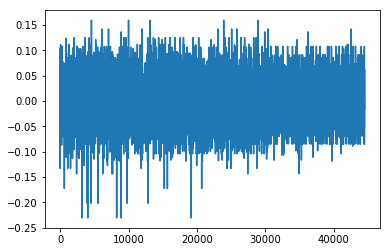

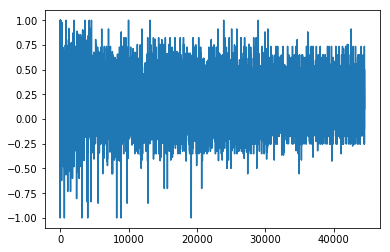

445
1.23038798863
[ 0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.66666667  0.11111111  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111]
Writing away results
1992-02-01 00:00:00


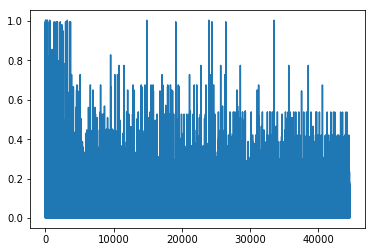

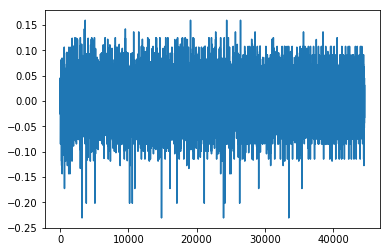

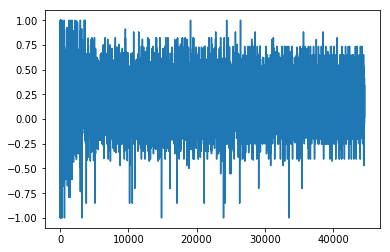

446
1.43749833438
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1992-03-01 00:00:00


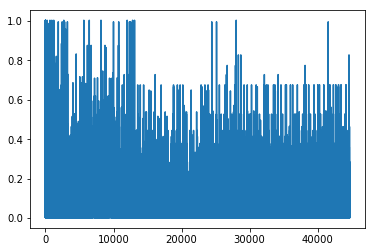

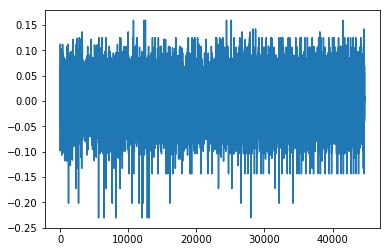

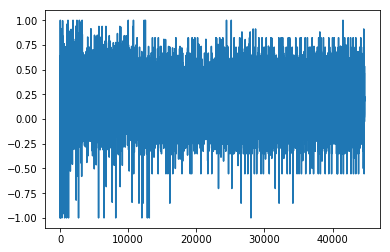

447
1.53492045301
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.66666667  0.66666667  0.77777778  0.77777778  0.66666667
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1992-04-01 00:00:00


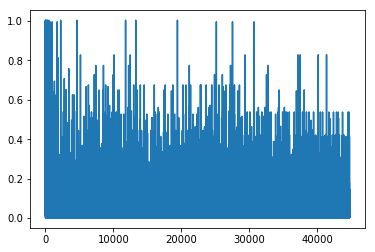

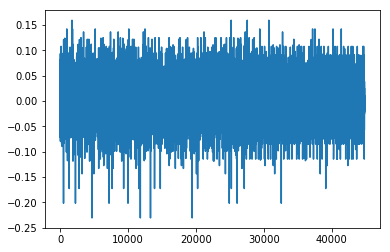

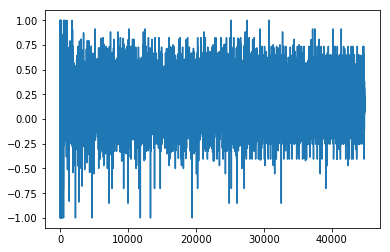

448
1.39961581361
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1992-05-01 00:00:00


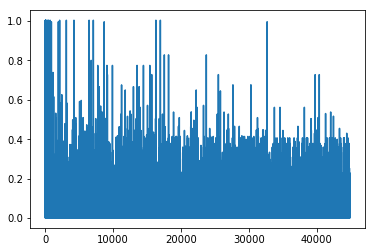

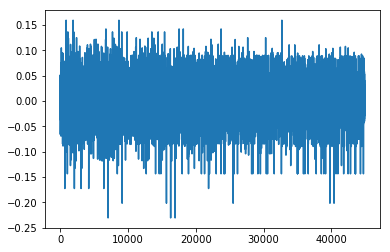

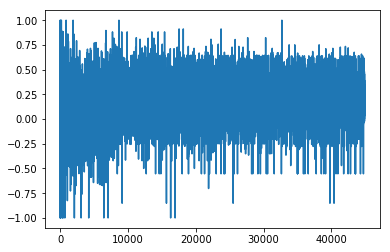

449
1.45385276718
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1992-06-01 00:00:00


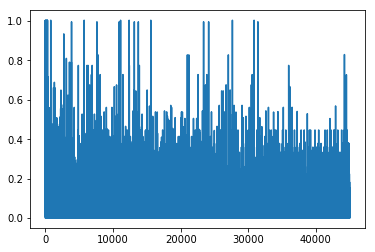

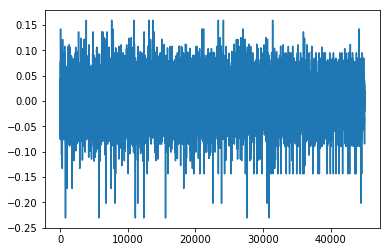

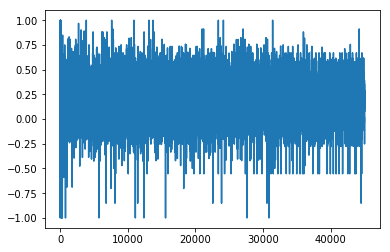

450
1.50019735482
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.          0.
  0.          0.          0.          0.66666667  0.          0.          0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667]
Writing away results
1992-07-01 00:00:00


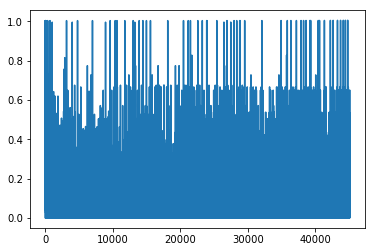

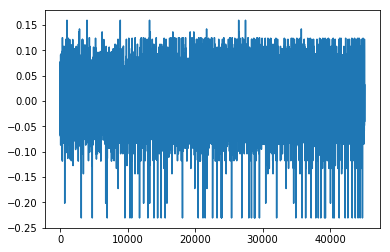

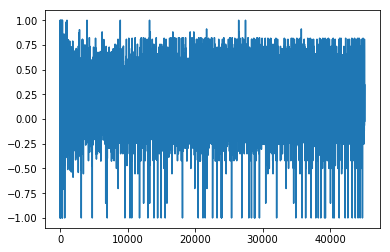

451
1.83771570618
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.        ]
Writing away results
1992-08-01 00:00:00


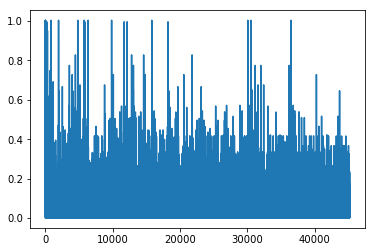

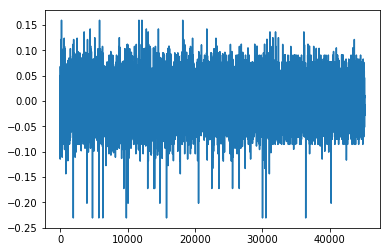

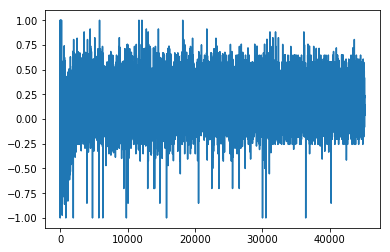

452
1.46042769753
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1992-09-01 00:00:00


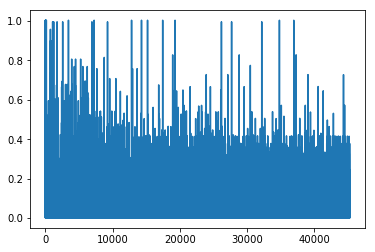

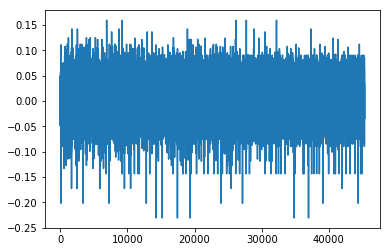

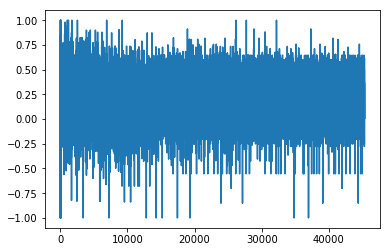

453
1.59237137611
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1992-10-01 00:00:00


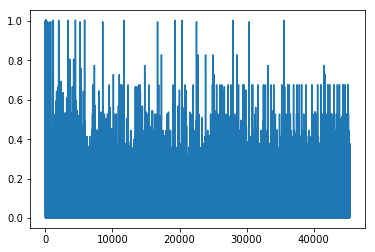

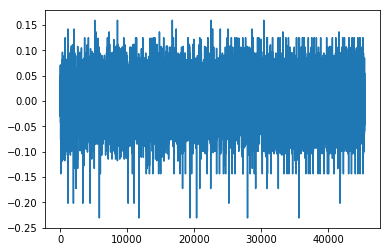

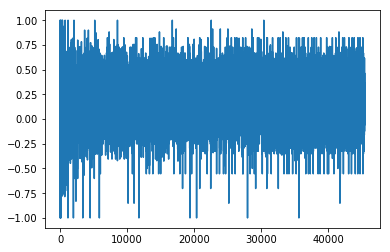

454
1.67988088966
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778
  0.66666667  0.66666667  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1992-11-01 00:00:00


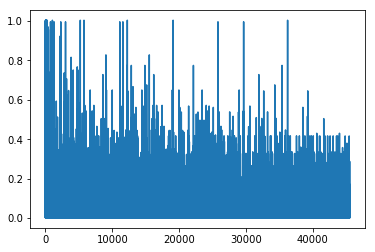

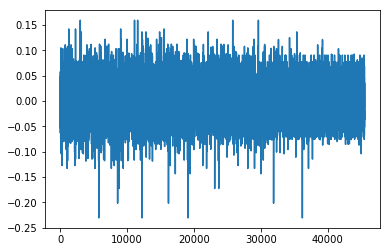

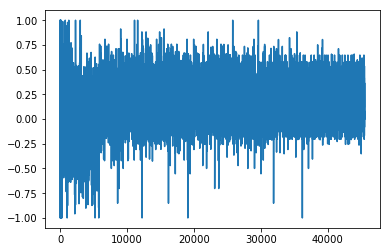

455
1.3540071387
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.55555556
  0.33333333  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Writing away results
1992-12-01 00:00:00


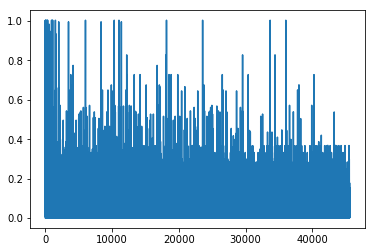

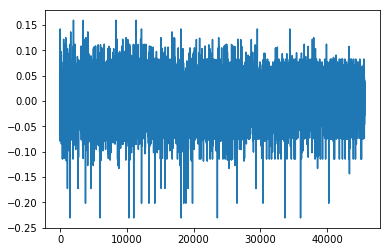

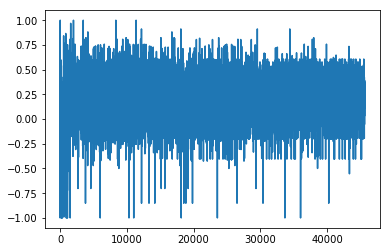

456
1.48620813785
[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1993-01-01 00:00:00


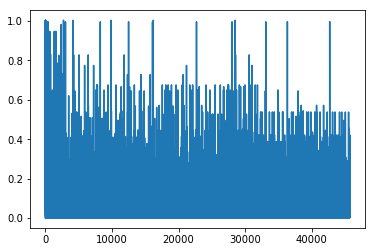

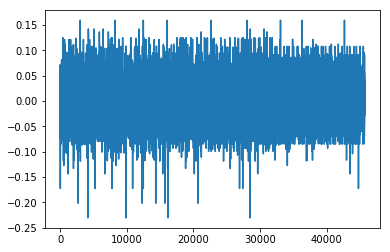

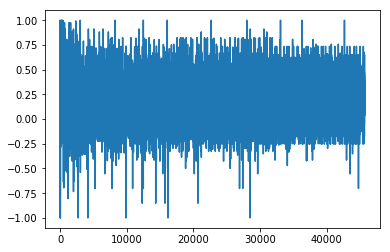

457
1.33762100804
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Writing away results
1993-02-01 00:00:00


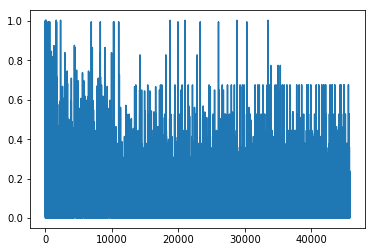

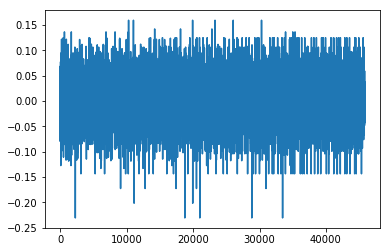

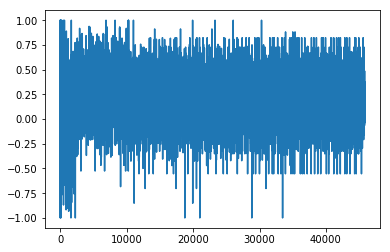

458
1.60165620963
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.66666667  0.77777778  0.77777778
  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1993-03-01 00:00:00


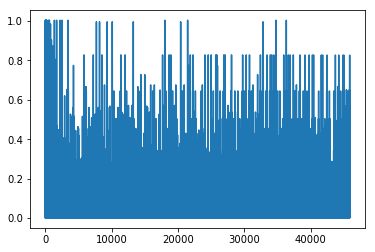

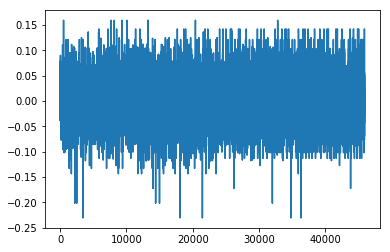

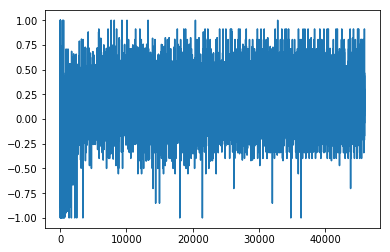

459
1.34903115071
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Writing away results
1993-04-01 00:00:00


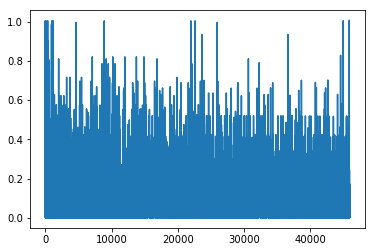

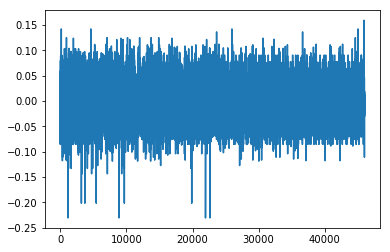

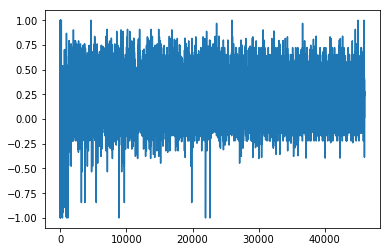

460
1.46232992388
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1993-05-01 00:00:00


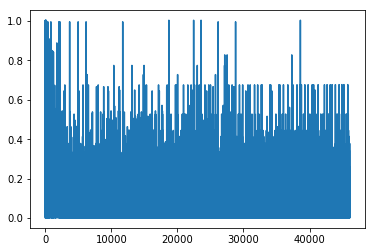

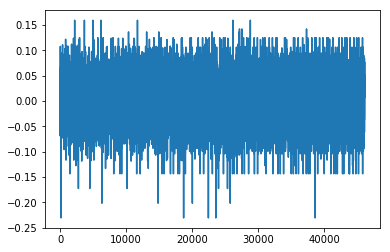

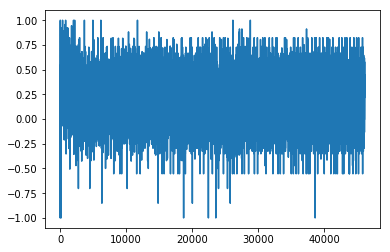

461
1.70464388626
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667
  0.66666667  0.77777778  0.77777778  0.66666667  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1993-06-01 00:00:00


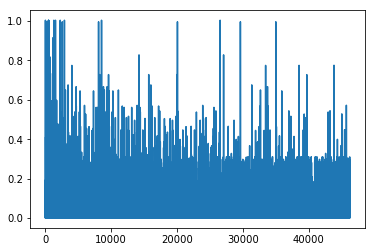

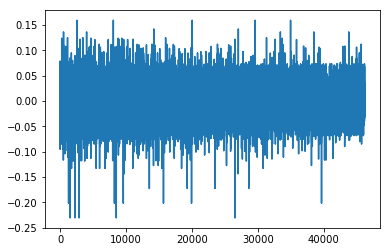

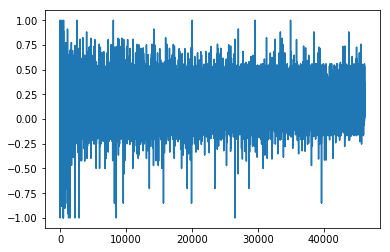

462
1.3244961365
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.44444444  0.44444444  0.33333333
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Writing away results
1993-07-01 00:00:00


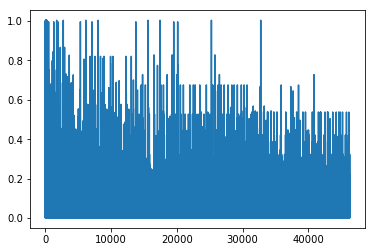

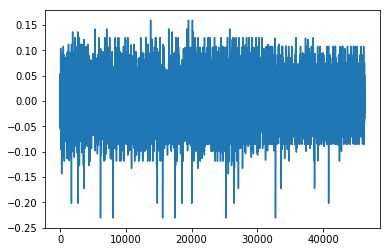

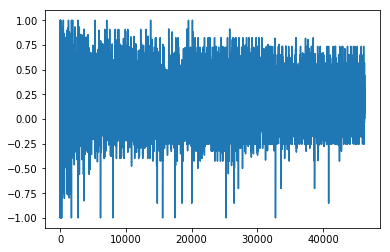

463
1.45188929154
[ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1993-08-01 00:00:00


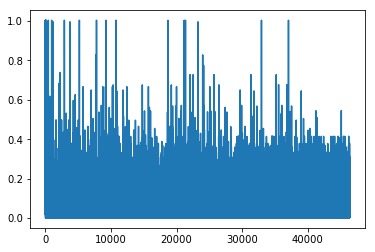

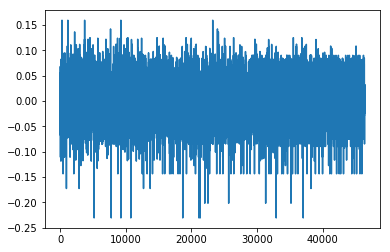

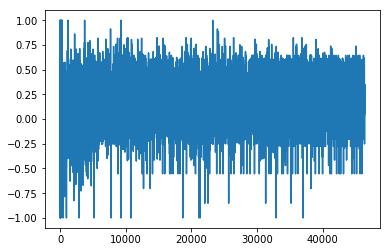

464
1.55777799925
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1993-09-01 00:00:00


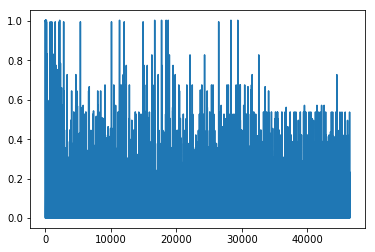

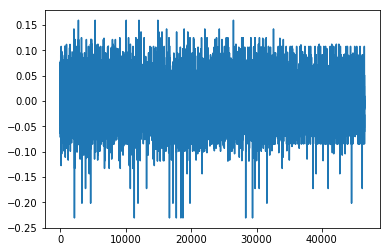

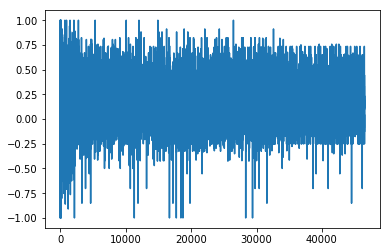

465
1.21015217131
[ 0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.66666667  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222]
Writing away results
1993-10-01 00:00:00


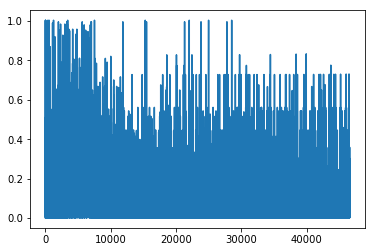

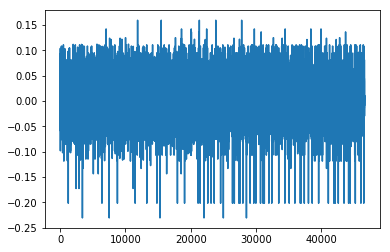

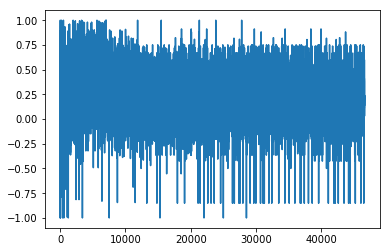

466
1.50496604327
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.          0.
  0.88888889  0.          0.          0.          0.          0.          0.
  0.          0.          0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.        ]
Writing away results
1993-11-01 00:00:00


In [ ]:
# initialize
init = tf.global_variables_initializer()
startepsilon = 1
endepsilon = 0.1
startlr = 0.8
endlr = 0.01
startgamma = 0.01
endgamma = 0.8
TWlist = []
Index = []
MWeights = []
Turnover = []
chooserlist = []
RU = []
learningrateQ = 0.01
n = len(mdata)
periods = 60
epochs = 100     # preferred to have a low amount of epochs because otherwise the the same data is used multiple times (usually not the case in stock returns)

# data parsing
dates = data['Date']
mdata = data[['r','xs','xb']]
mdata.index = pd.DatetimeIndex(dates)

# include the lags
for i in range(1,num_lags+1):  # 1 till 11
    mdata['r_lag' + str(i)] = mdata['r'].shift(i)
    mdata['xs_lag' + str(i)] = mdata['xs'].shift(i)
    mdata['xb_lag' + str(i)] = mdata['xb'].shift(i)

mdata.drop(mdata.head(num_lags).index, inplace=True)
# have a look at the data (if not include NANs)
# print(mdata)

# Train the the Q-function DNN
with tf.Session() as sess:
    for i in range(307,int(n-periods-1)):
        lostlist = []
        sess.run(init) # initialize the Neural Network again
        OptimalWeights = np.zeros(periods-1)
        currentK = 0
        print(mdata.index[i])
        rmin = -1
        rmax = 1
        lr = 0.1
        gamma = 0.98
        currentEpoch = 0
        rlist = []  
        runitlist = []
        while currentEpoch < epochs:
            epsilon = startepsilon*(epochs - currentEpoch)/epochs + endepsilon*(1 - (epochs-currentEpoch)/epochs)
            #Training of the Q-Network for the data available (with Neural Nets) 
            indexes = np.asarray(range(i)) # because of range (automatically minus 1(start at 0))
            random.shuffle(indexes)
            for j in indexes:
                s = mdata.iloc[j,:].values.reshape(1,num_inputvar)
                #Choose an action by greedily (with e chance of random action) from the Q-network
                a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
                a = A[a_int]  # -1 because index
                if np.random.rand(1) < epsilon:
                    a = random.choice(A)

                #Get new state and reward from environment
                s1 = mdata.iloc[j+1,:].values.reshape(1,num_inputvar)
                r = (a*s1[0][1] + (1-a)*s1[0][2]) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                rlist.append(r)
                Q = sess.run(output,feed_dict={NN_input:s1})
                    
                #Obtain maxQ' and set our target value for chosen action.
                Q1 = np.max(Q)
                targetQ = allQ
                if(len(rlist)>1):
                    rmin = np.min(rlist)
                    rmax = np.max(rlist)
                runit = -1 + 2*((r -rmin)/(rmax-rmin))
                targetQ[0,int(a*(num_actions-1))] = runit + gamma*Q1
                runitlist.append(runit)
                #Train the neural network using target and predicted Q values
                opt,W1,loss_ = sess.run([optmzr,w1,loss],feed_dict={NN_input:s,Q_Next:targetQ,learning_rate:lr})
                lostlist.append(loss_)
            currentEpoch += 1
                
        while currentK < periods - 1:
            # After training now calculate the optimal weights for the K=60 periods to come
            s = mdata.iloc[i+currentK,:].values.reshape(1,num_inputvar)
            a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
            aOpt = A[a_int]
            OptimalWeights[currentK] = aOpt
            currentK += 1
            
        # For insight purposes (Write away)
        plt.ion()
        plt.plot(lostlist)
        plt.show()
        plt.plot(rlist)
        plt.show()
        plt.plot(runitlist)
        plt.show()
        
        firstdiff = OptimalWeights[1:] - OptimalWeights[:-1]
        MWeights.append(np.mean(OptimalWeights))
        TerminalWealth = np.exp(sum(OptimalWeights*mdata[i+1:i+currentK+1]['xs'] + (1-OptimalWeights)*mdata[i+1:i+currentK+1]['xb']))
        TWlist.append(TerminalWealth)
        Index.append(mdata.index[i])
        print(i)
        Turnover.append(sum(abs(firstdiff*np.exp(mdata[i+1:i+currentK]['xs'])) + abs((1-firstdiff)*np.exp(mdata[i+1:i+currentK]['xb']))))
        RU.append((1/(1-5))*pow(TerminalWealth,(1-5)))
        print(TerminalWealth)
        print(OptimalWeights)
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights,'Turnover':Turnover, 'Realized Utility':RU})
        df.to_excel('DNN_epsilonlearn_currentK_w2_softmax(2).xlsx', sheet_name='sheet1', index=False)
print('Done!')
        